In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pywaffle import Waffle

In [3]:
root_path = '/Users/lpwilson/Ada/Developer/projects/Capstone/EEO1s/'
EEO1_data = pd.read_csv(root_path + 'long_csv.csv')
EEO1_data = pd.DataFrame(EEO1_data)
EEO1_data = EEO1_data.drop(columns = ['Unnamed: 0'])


In [17]:
job_categories = ['Exec/Sr. Officials & Mgrs','First/Mid Officials & Mgrs','Professionals','Technicians','Sales Workers','Administrative Support','Craft Workers','Operatives','Laborers & Helpers','Service Workers']
race_categories = ['Hispanic or Latino','White','Black or African American','Native Hawaiian Or Pacific Islander','Asian','American Indian or Alaska Native','Two or More Races']
gender_categories = ["Male", "Female"]

sortBy_cats = {
    "gender": gender_categories,
    "race": race_categories,
    "job_category": job_categories}
#get list of companies to iterate over
companies = EEO1_data['company'].unique().tolist()


I'm going to collect all my waffle graph functions here.

In [6]:
def data_totals(company, category, data, sortBy1, sortBy2 , percent = False):
    """This takes in a company, job categories to show, and fields to filter by (defaulting to job_category and gender)
    and returns data of the employee counts over the available years in the data set."""
    filtered_df = pd.DataFrame(data.query(f"company == '{company}'").query(f"{sortBy1} =='{category}'").groupby([sortBy1, sortBy2]).agg({'count_employees': 'sum'}))
    if percent == True:
        percs = filtered_df.groupby(level = 0, group_keys = False).apply(lambda x:(100 * x /float(x.sum())).round())
        data = percs
    else:
        data = filtered_df

    return data

In [11]:
def make_query_dict(company, sortBy1, sortBy2, sortBy_cats):
    """this takes in a company, the two fields to query by, and a dictionary with keys: the possible fields for sortBy1, 
    and values the possible values of sortBy1."""
    sortBy1_cats = sortBy_cats[sortBy1]
    query_dict = {}
    for cat in sortBy1_cats:
        cat_dict = {}
        cat_string = ''.join([x for x in cat[0:5] if x.isalpha()])
        file_name = company + cat_string + '_' + sortBy2
        cat_dict['cat'] = cat
        cat_dict['data'] = data_totals(company, cat, EEO1_data, sortBy1 = sortBy1, sortBy2 = sortBy2, percent=True)
        query_dict[file_name] = cat_dict

    return query_dict

In [12]:
def get_gender_race_data_for_company(company, job_categories=job_categories):
    company_gender_race_dict = {}
    company_gender_race_dict['jobs_by_gender'] = make_query_dict(company, 'job_category', 'gender', sortBy_cats)
    company_gender_race_dict['jobs_by_race'] = make_query_dict(company, 'job_category', 'race', sortBy_cats)
    company_gender_race_dict['race_by_jobs'] = make_query_dict(company, 'race', 'job_category', sortBy_cats)
    company_gender_race_dict['gender_by_jobs'] = make_query_dict(company, 'gender', 'job_category', sortBy_cats)
    return company_gender_race_dict


In [21]:
def make_waffle_fig(perc_data, cat, file_name, company , sortBy2 ):
    vert_space = len(perc_data) * (-.3/6)


    fig = plt.figure(
        FigureClass=Waffle,
        rows = 10,
        columns = 10,
        values = perc_data,
        # labels=list(amz_tech_gender.index),
        # legend={'loc': 'upper left', 'bbox_to_anchor':(1,1)},
        title={'label': company + " " + cat+ "employees by " + sortBy2,
        'loc': 'left',
        'fontdict': {
            'fontsize': 16
        }
        },
        labels = [f"{k[1]} ({int(v)}%)" for k, v in perc_data.items()],
        legend={
            'loc': 'lower left',
            'bbox_to_anchor': (0, vert_space),
            #'ncol': len(perc_data),
            'ncol': 2,
            'framealpha': 0,
            'fontsize': 8
        }
    )
    fig.savefig(str(file_name) + ".png", bbox_inches="tight")
    return fig

In [22]:
company_data = {}
for company in companies:
    company_data[company] = get_gender_race_data_for_company(company)

#company_data

{'cat': 'Exec/Sr. Officials & Mgrs', 'data':                                   count_employees
job_category              gender                 
Exec/Sr. Officials & Mgrs Female             34.0
                          Male               66.0}
made waffle fig
{'cat': 'First/Mid Officials & Mgrs', 'data':                                    count_employees
job_category               gender                 
First/Mid Officials & Mgrs Female             25.0
                           Male               75.0}
made waffle fig
{'cat': 'Professionals', 'data':                       count_employees
job_category  gender                 
Professionals Female             27.0
              Male               73.0}
made waffle fig
{'cat': 'Technicians', 'data':                      count_employees
job_category gender                 
Technicians  Female             13.0
             Male               87.0}
made waffle fig
{'cat': 'Sales Workers', 'data':                       count_employees
jo

/var/folders/q2/g4rvv9lj4594r_pxcwzdhr6h0000gn/T/ipykernel_55788/475267868.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(


made waffle fig
{'cat': 'American Indian or Alaska Native', 'data':                                                              count_employees
race                             job_category                               
American Indian or Alaska Native Administrative Support                  2.0
                                 Craft Workers                           0.0
                                 Exec/Sr. Officials & Mgrs               0.0
                                 First/Mid Officials & Mgrs             10.0
                                 Laborers & Helpers                      0.0
                                 Operatives                              0.0
                                 Professionals                          82.0
                                 Sales Workers                           5.0
                                 Service Workers                         0.0
                                 Technicians                             0.0}
made wa

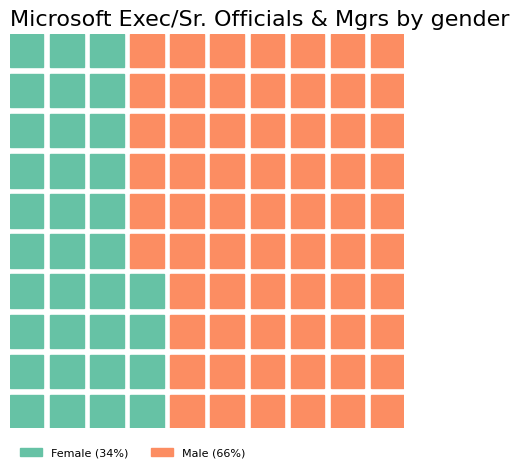

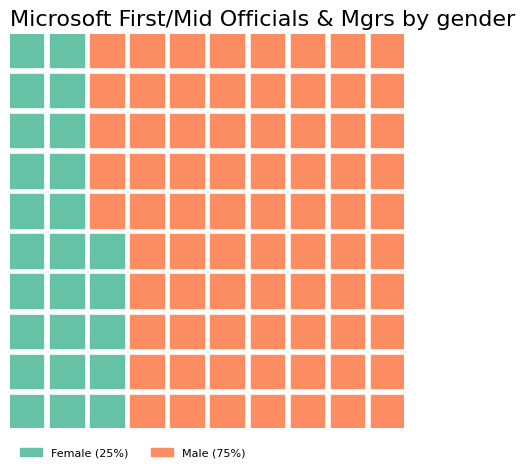

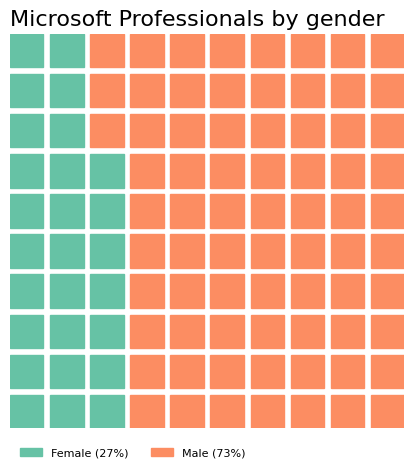

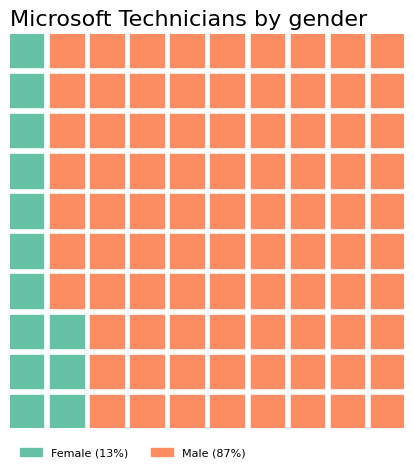

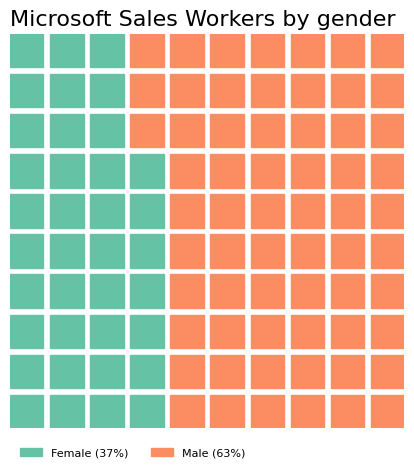

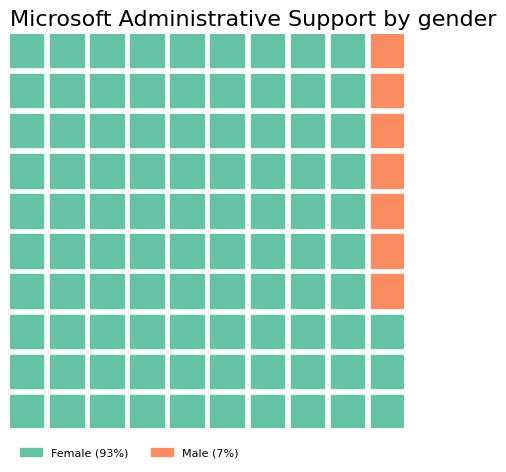

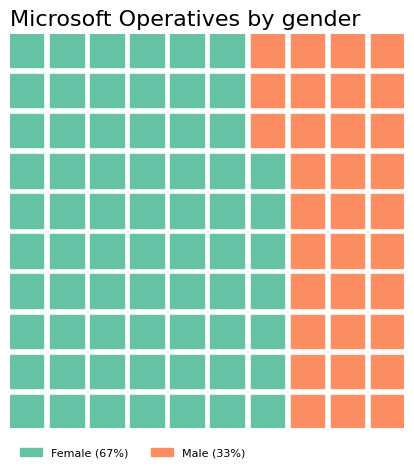

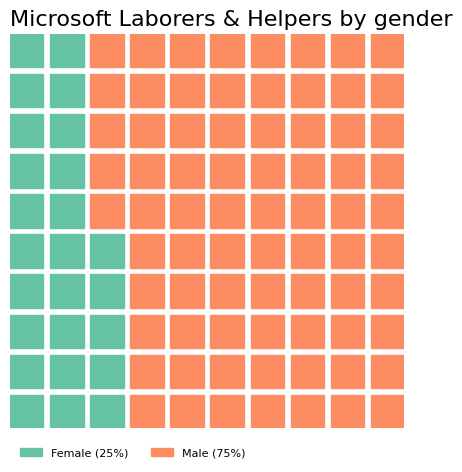

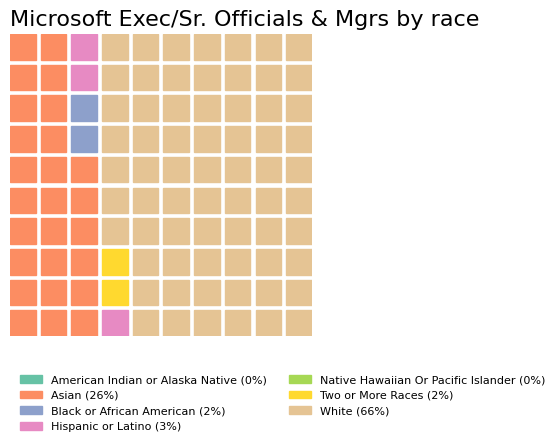

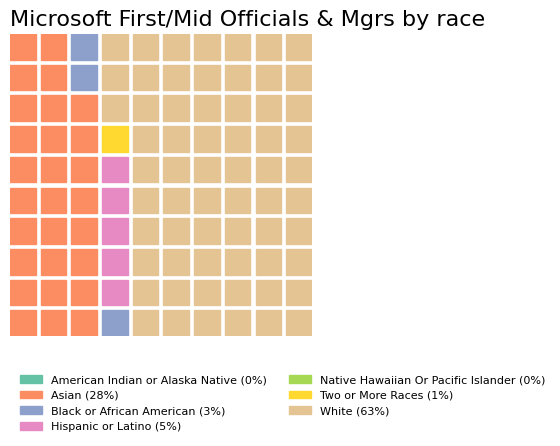

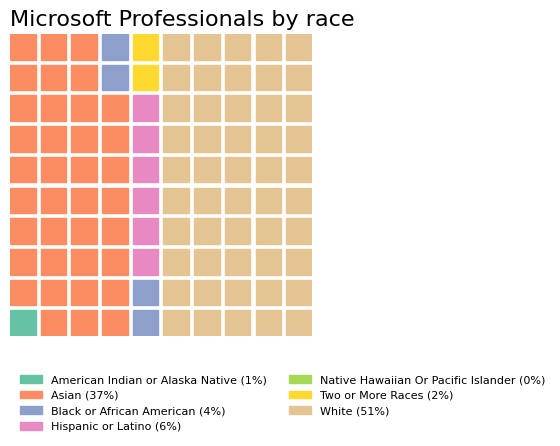

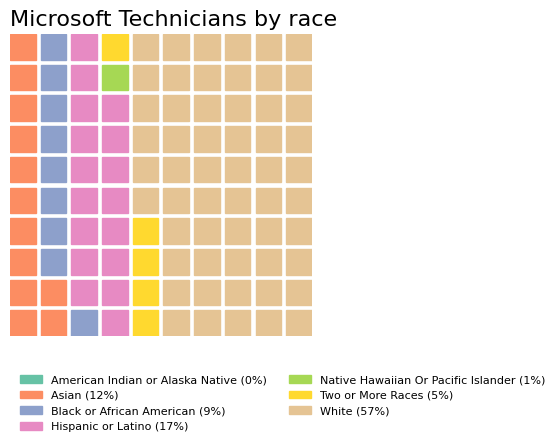

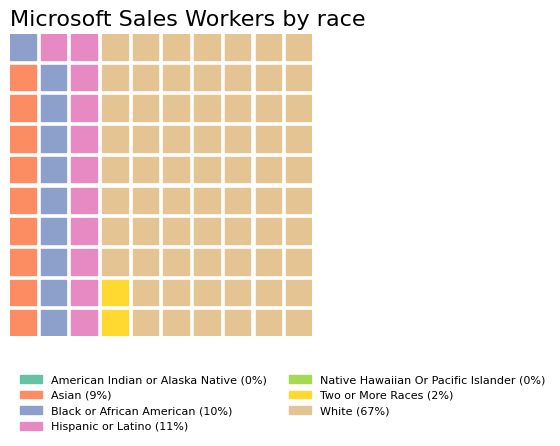

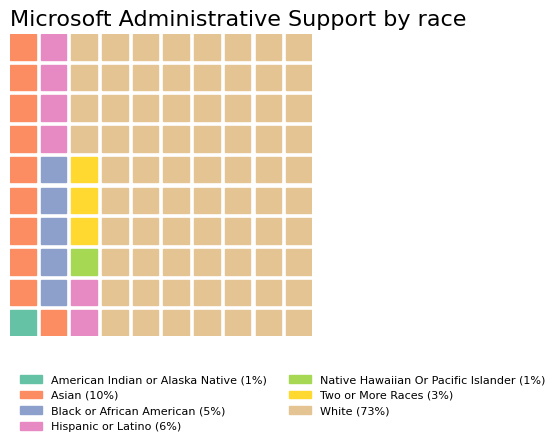

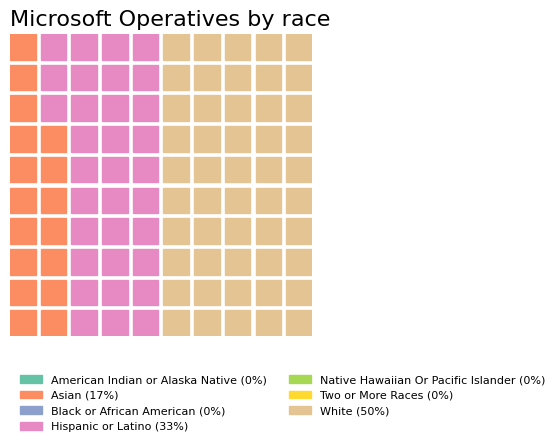

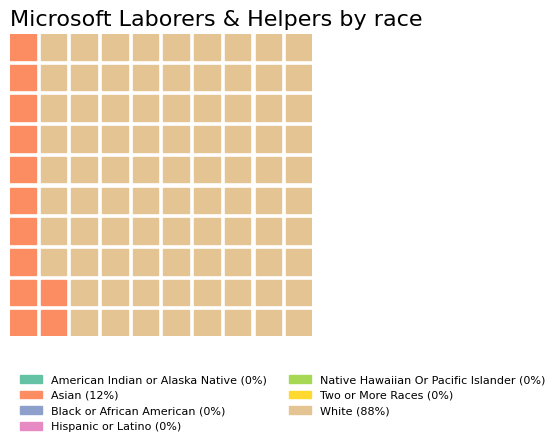

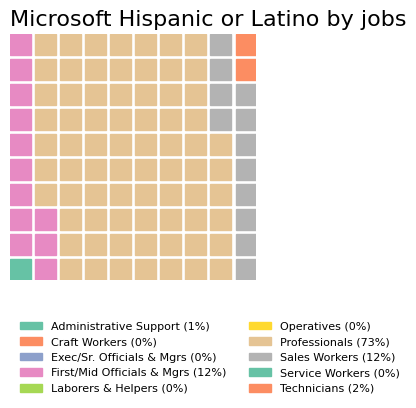

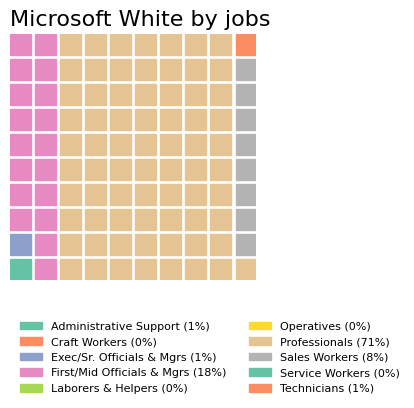

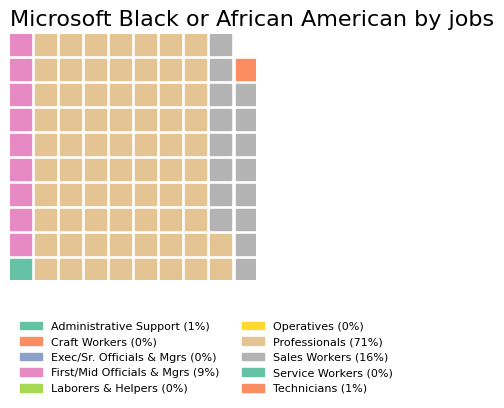

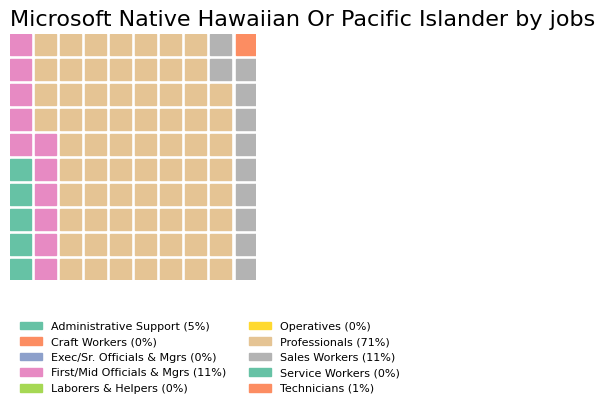

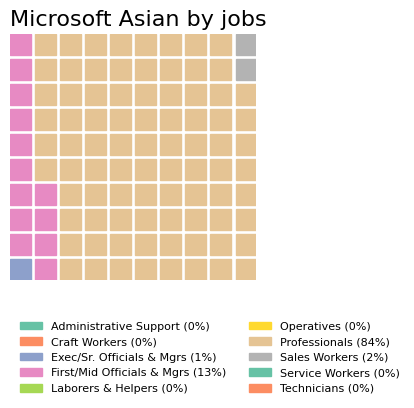

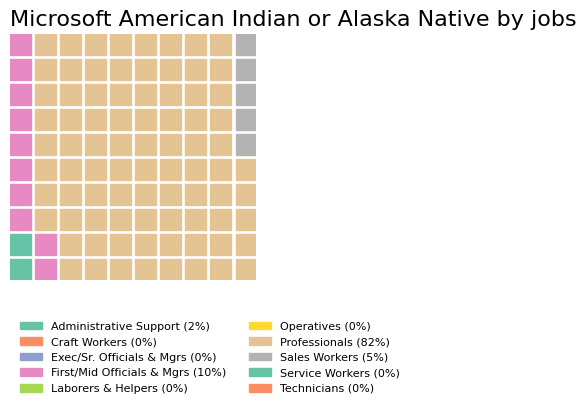

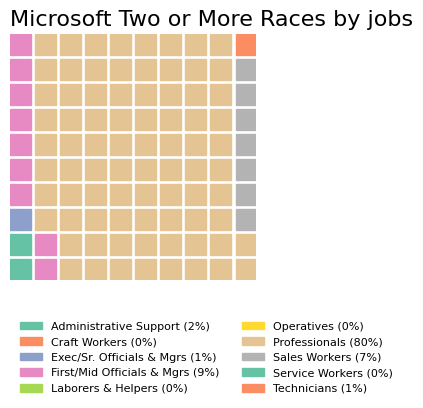

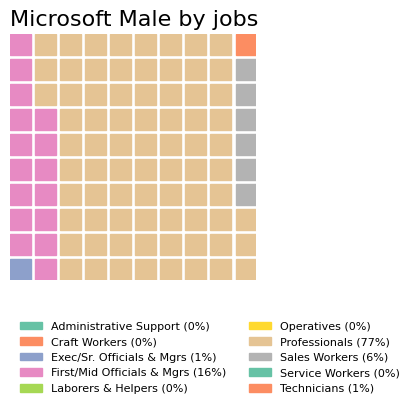

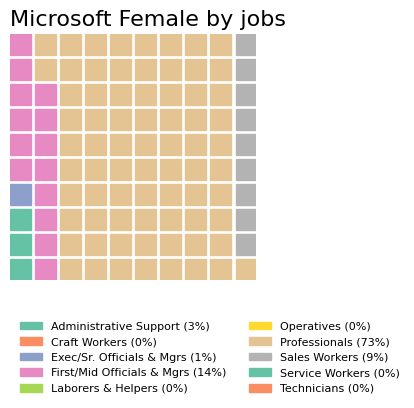

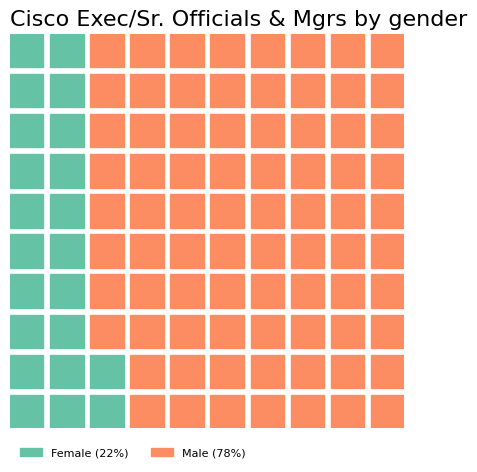

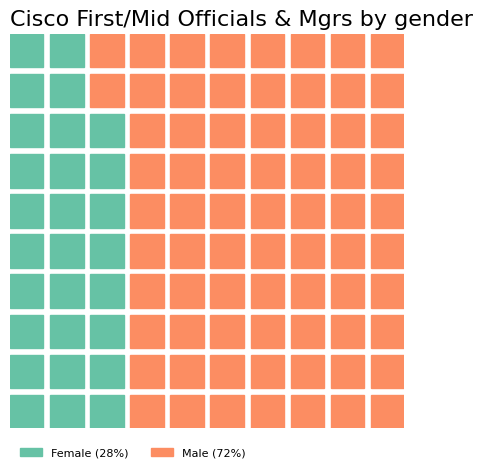

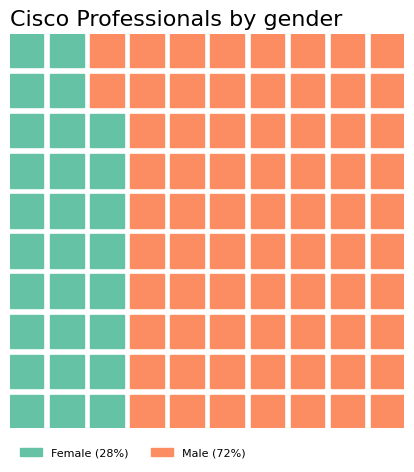

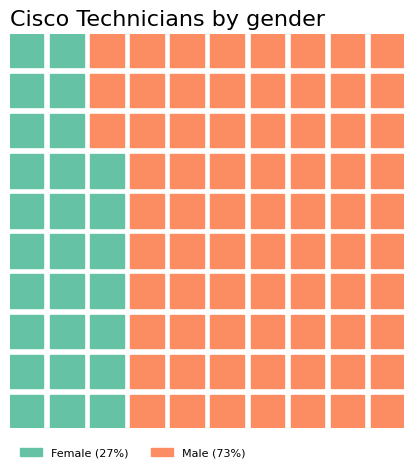

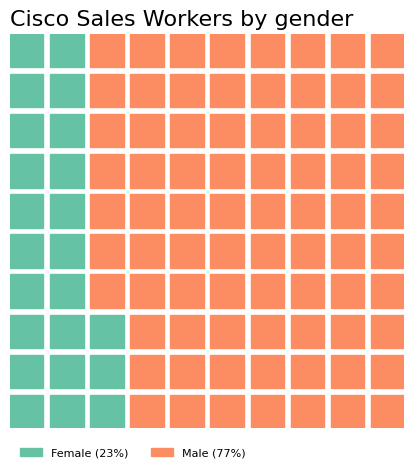

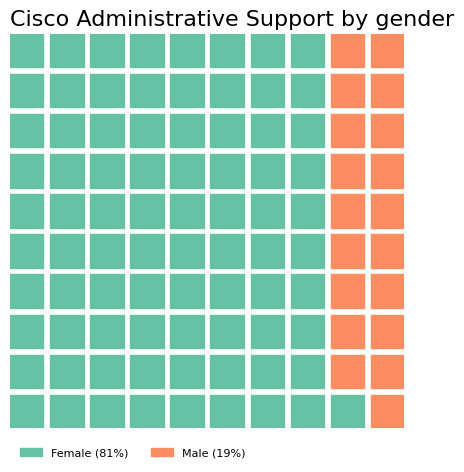

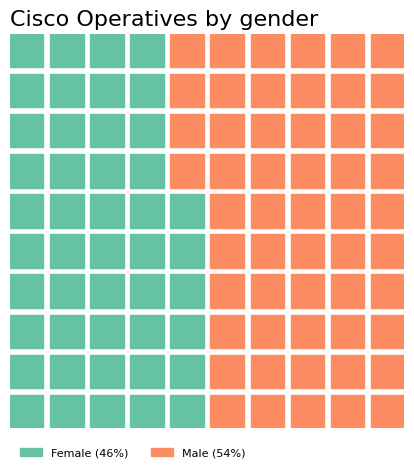

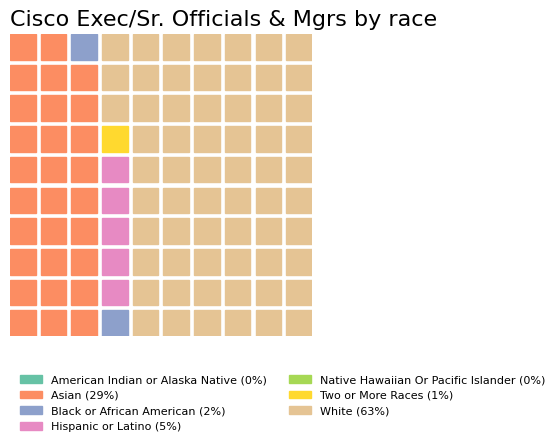

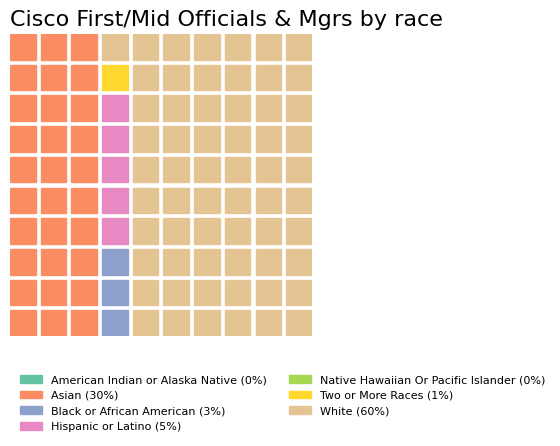

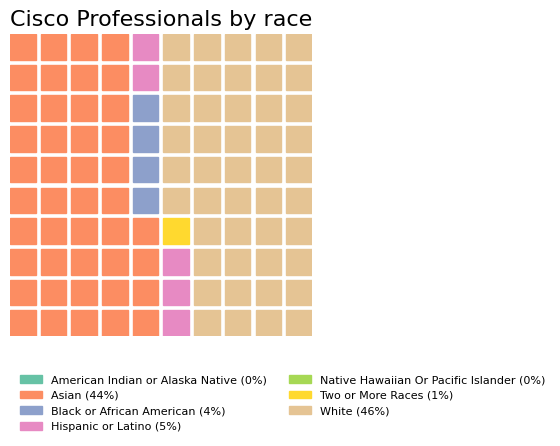

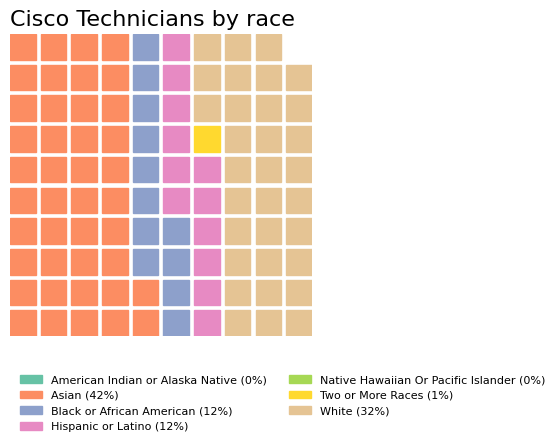

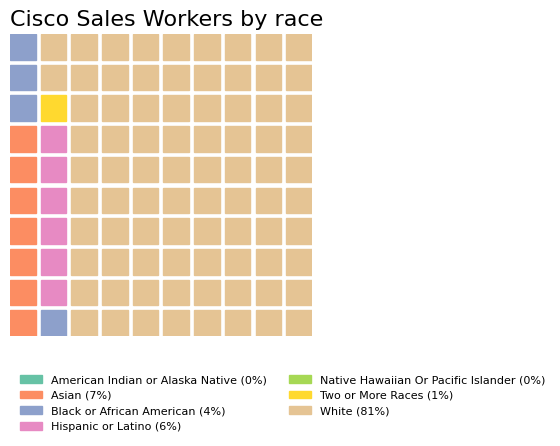

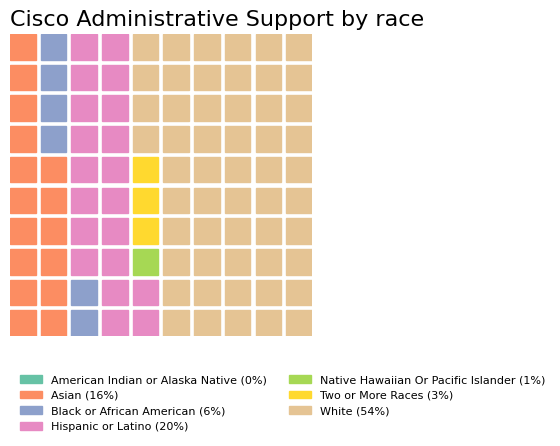

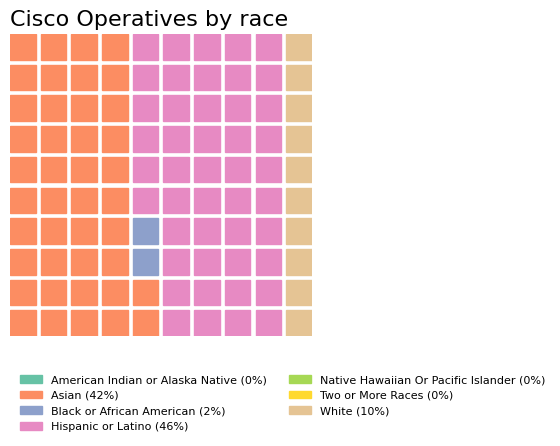

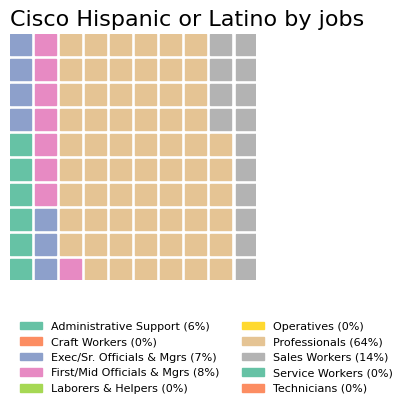

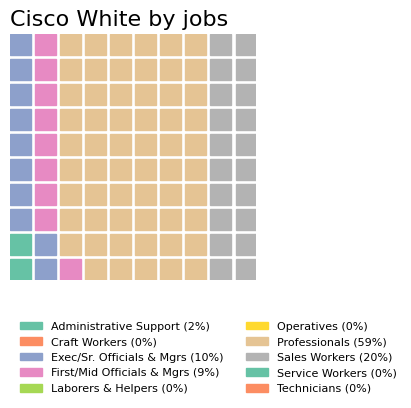

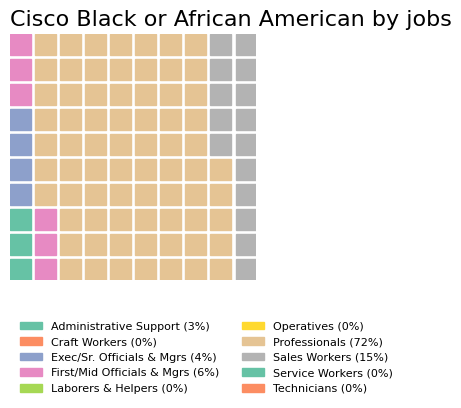

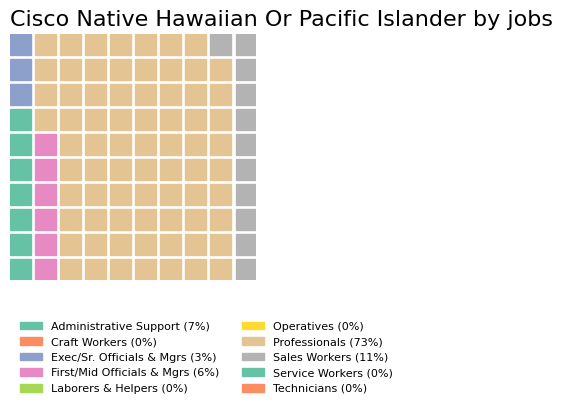

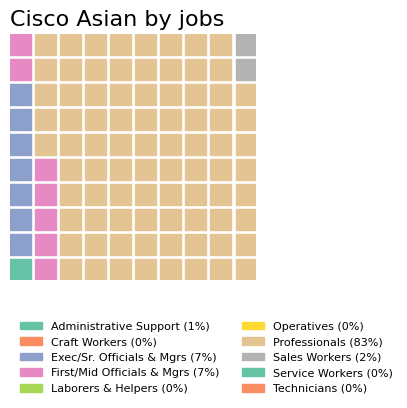

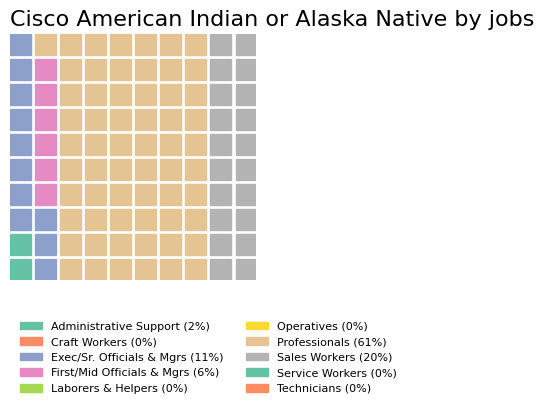

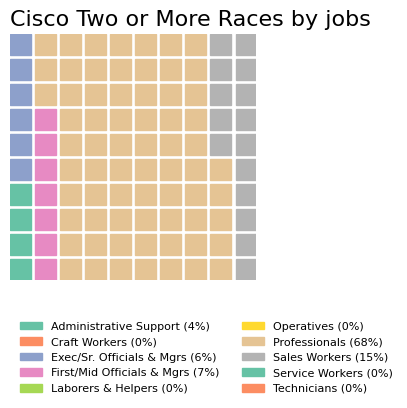

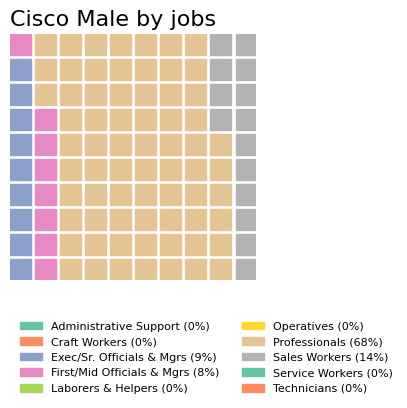

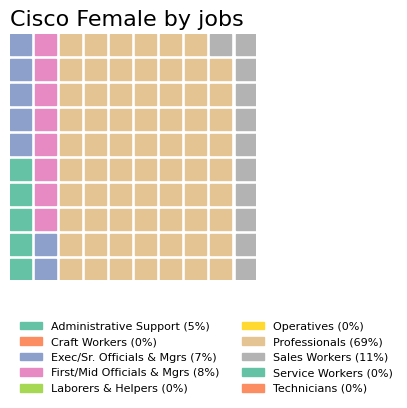

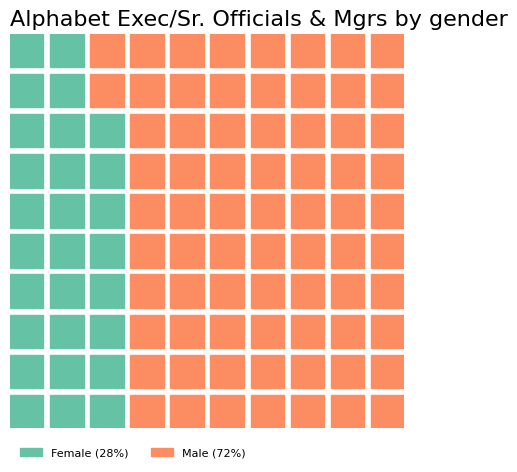

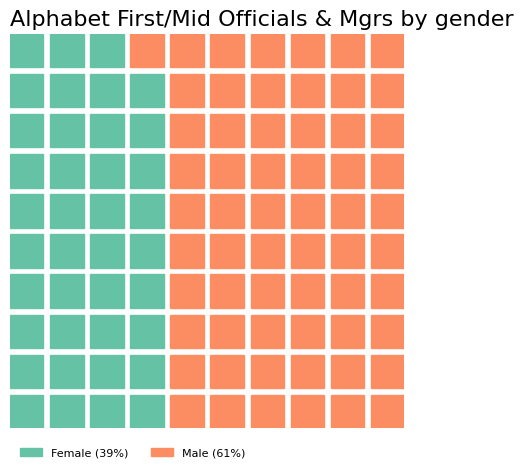

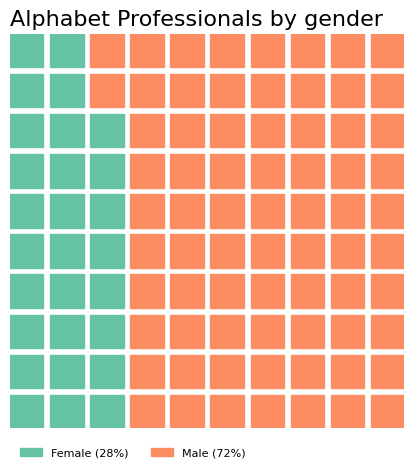

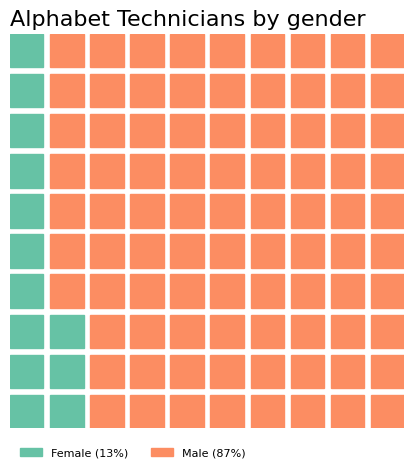

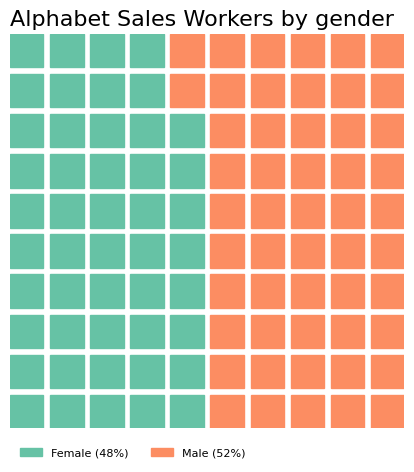

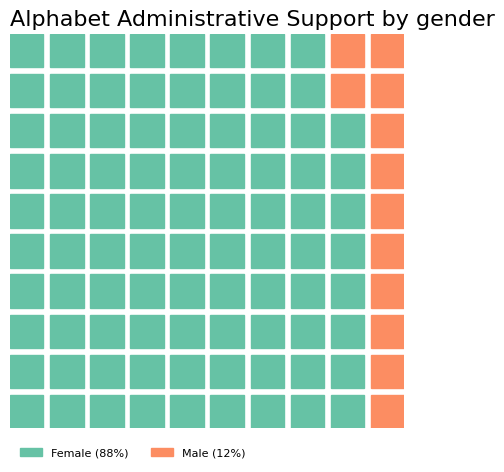

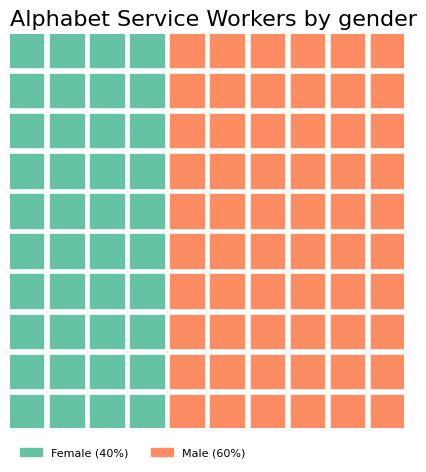

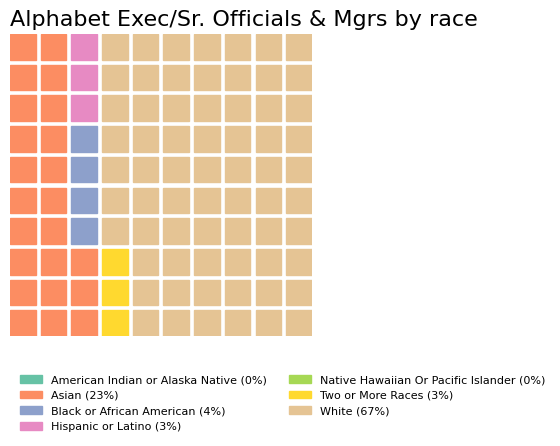

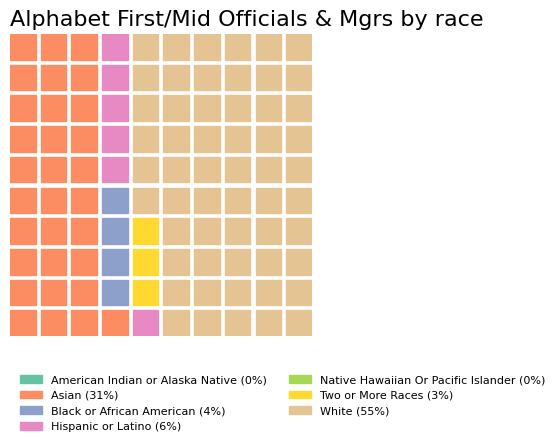

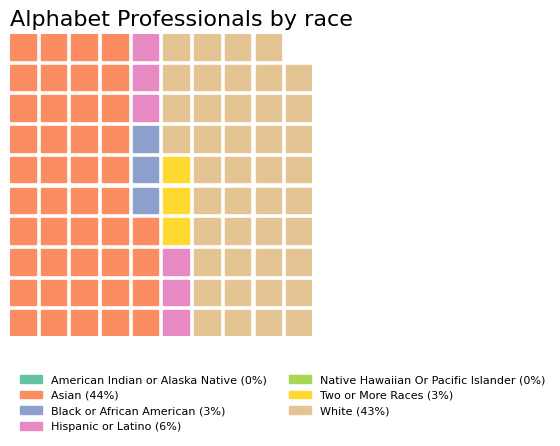

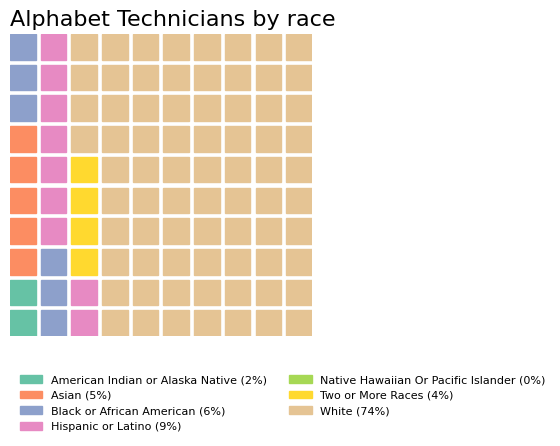

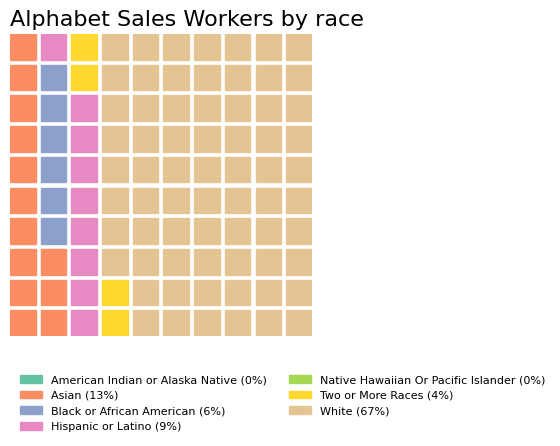

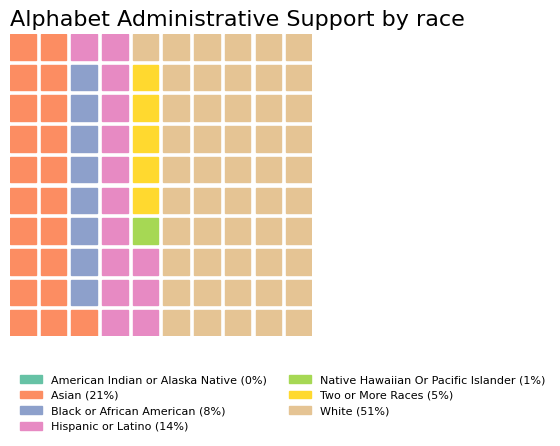

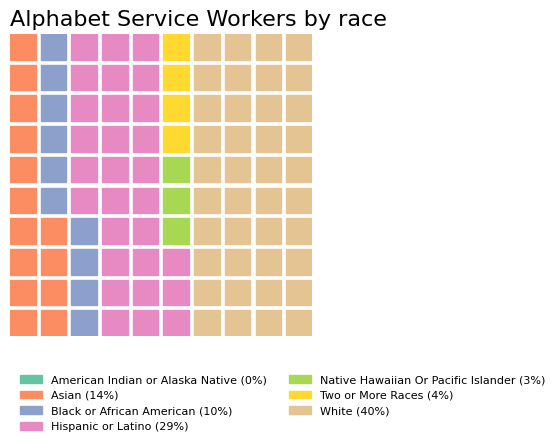

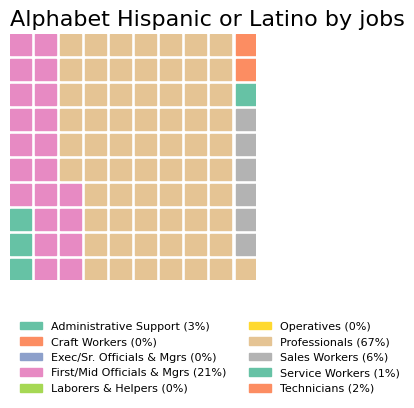

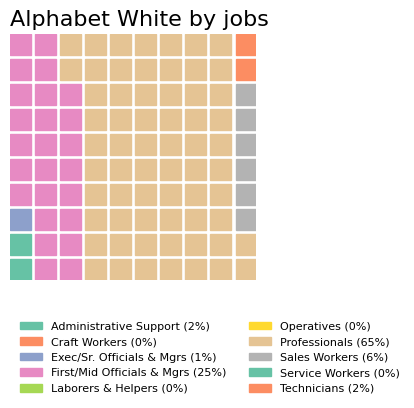

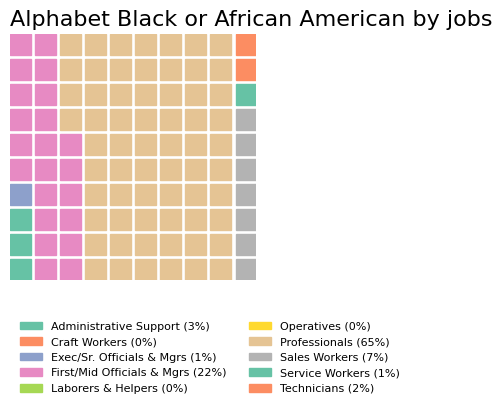

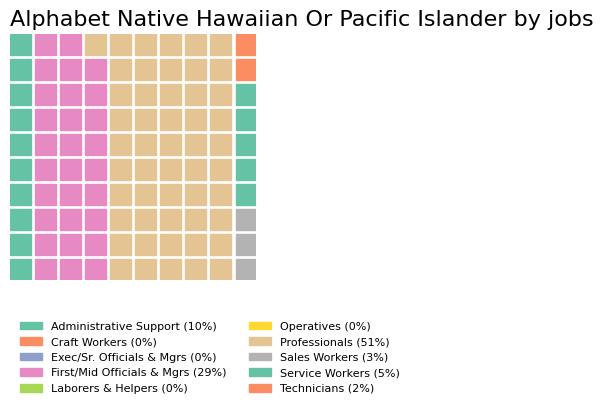

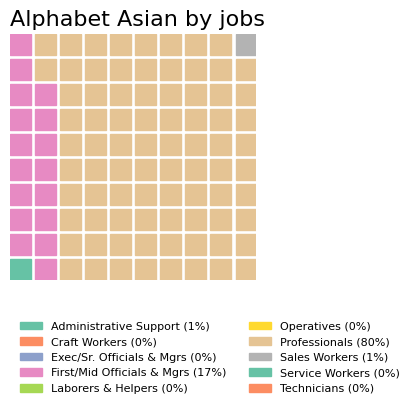

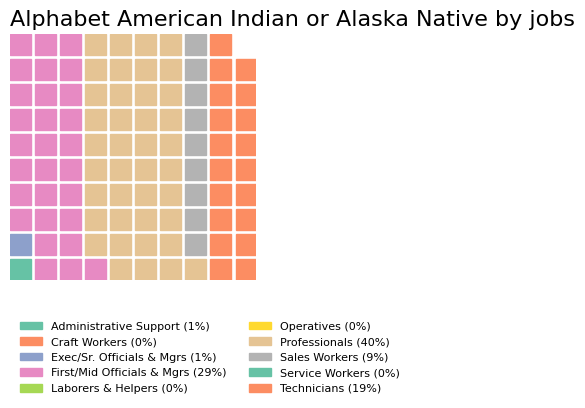

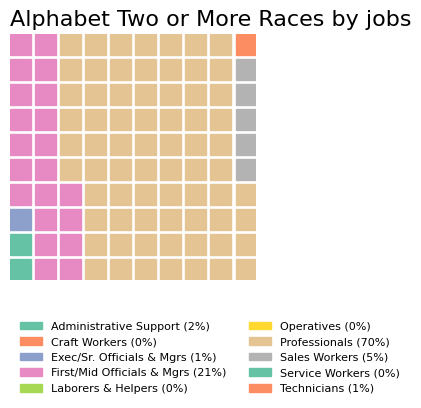

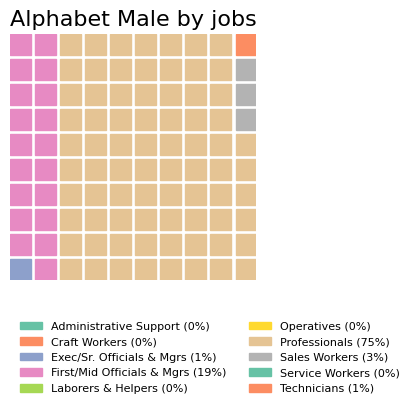

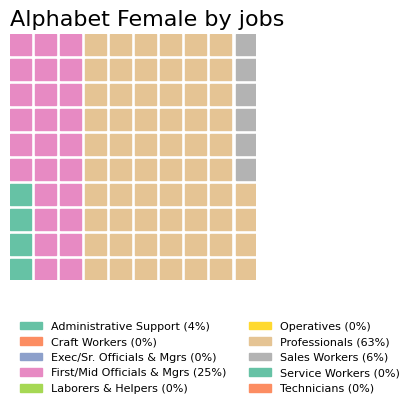

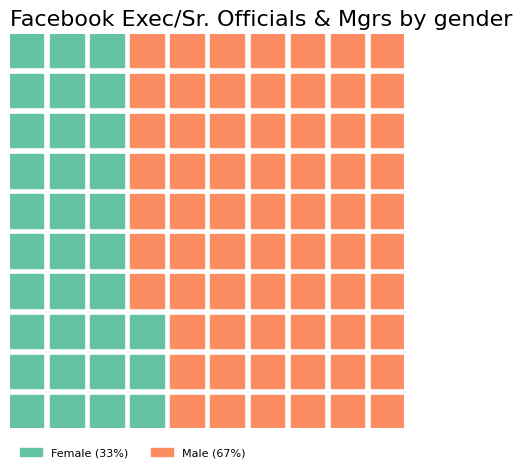

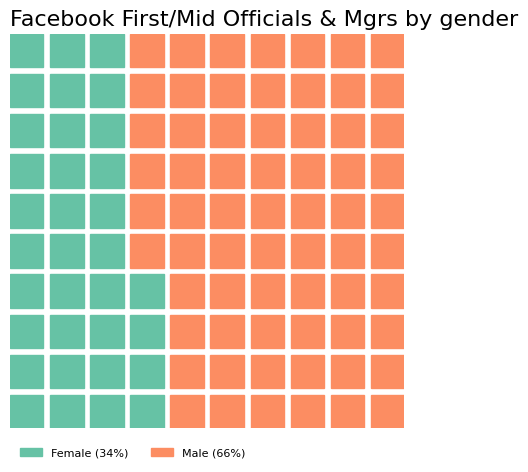

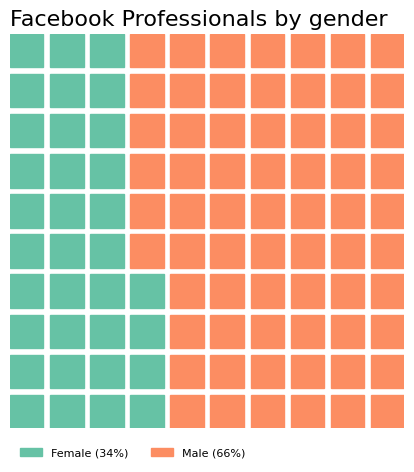

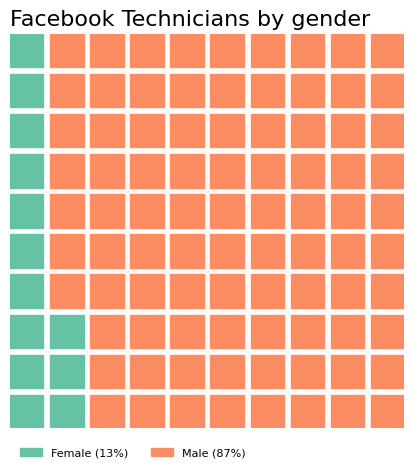

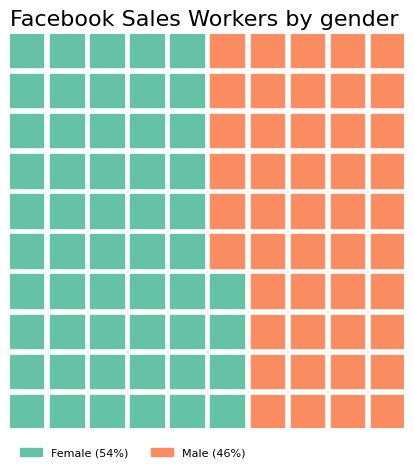

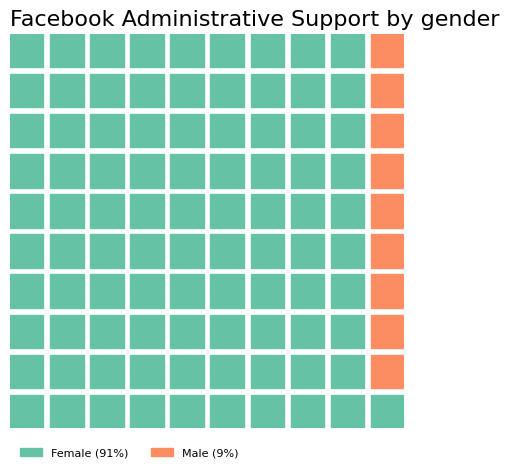

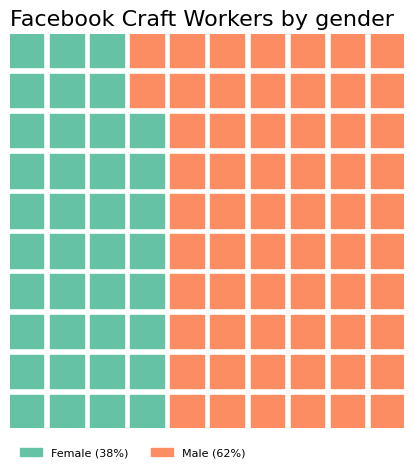

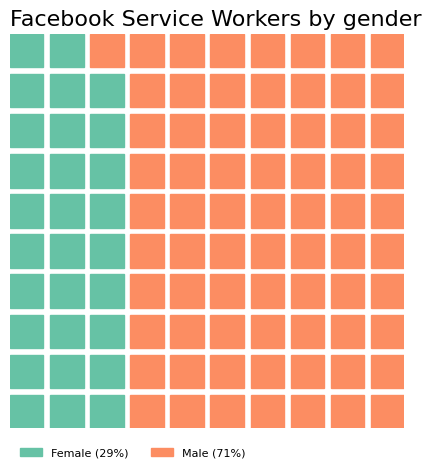

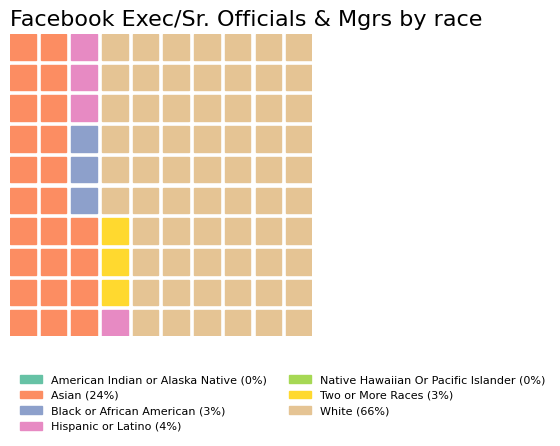

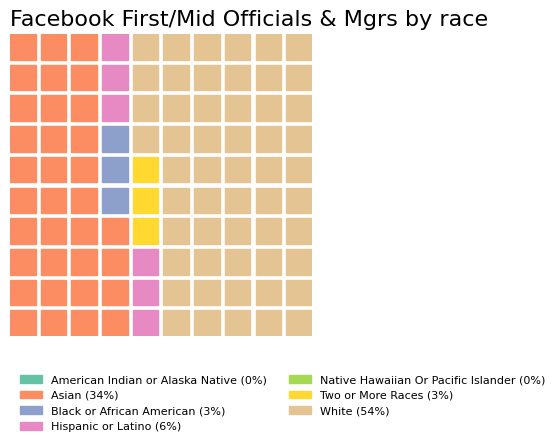

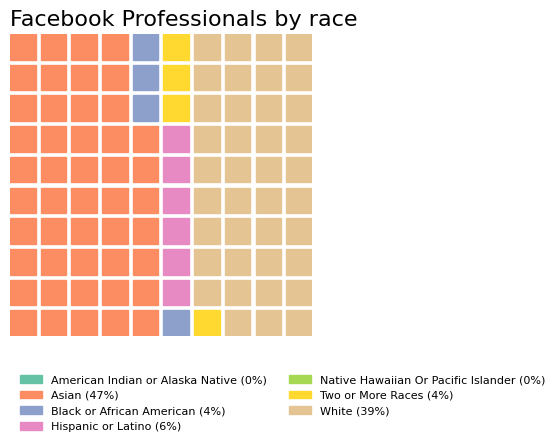

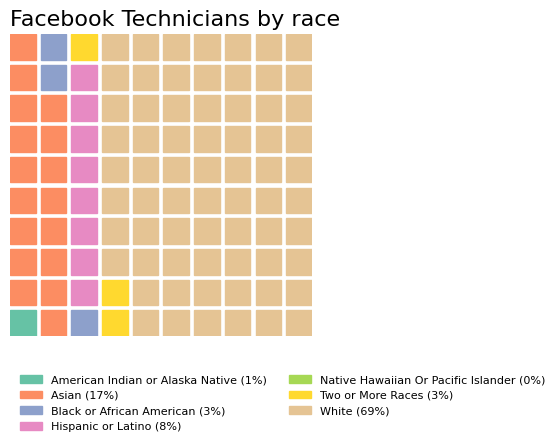

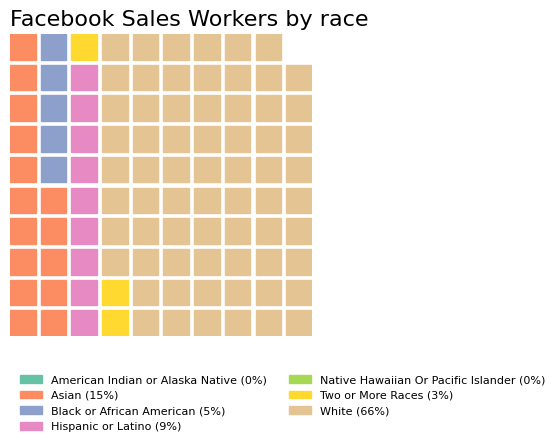

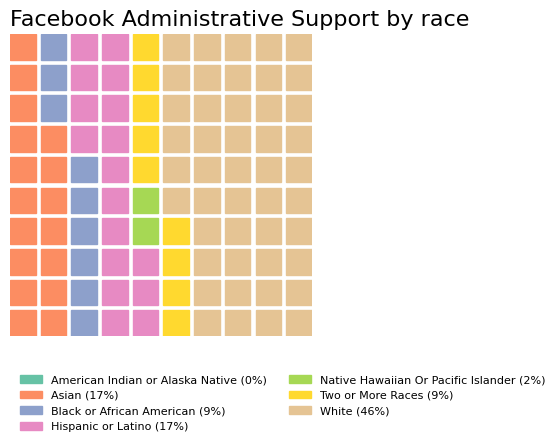

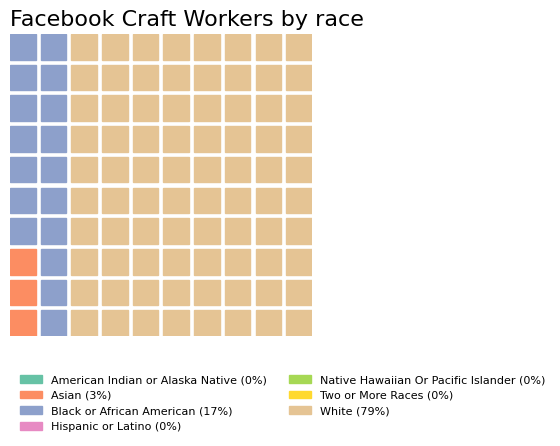

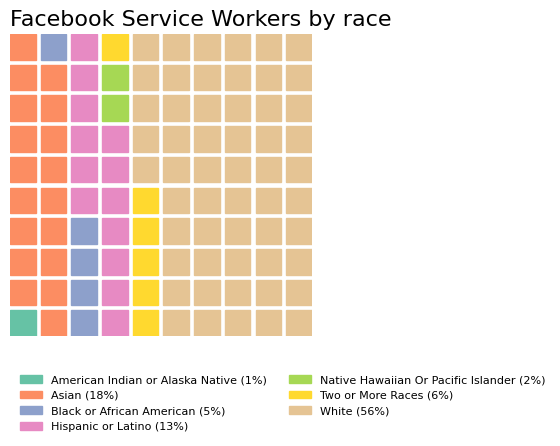

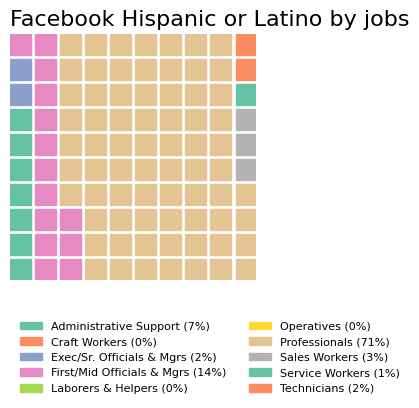

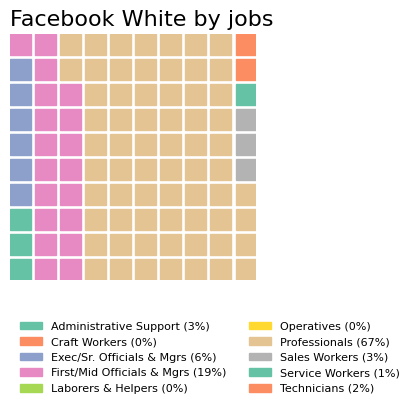

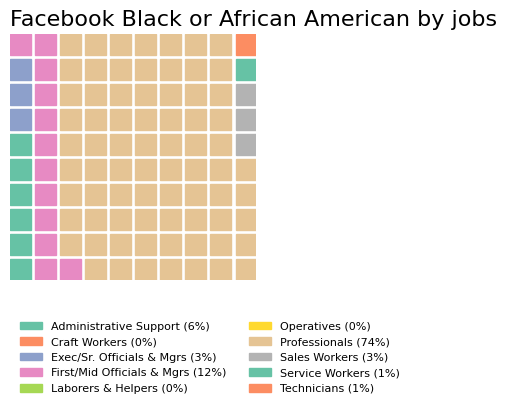

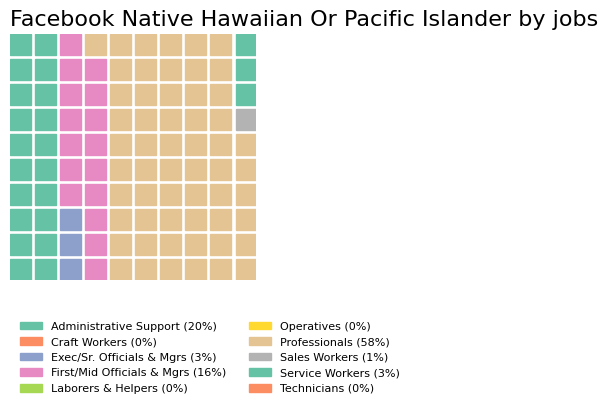

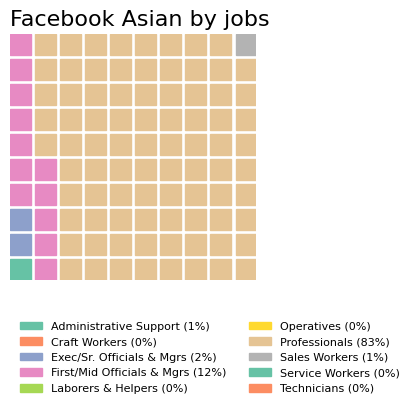

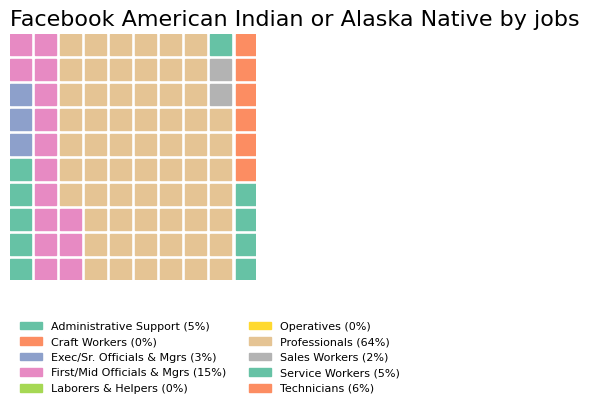

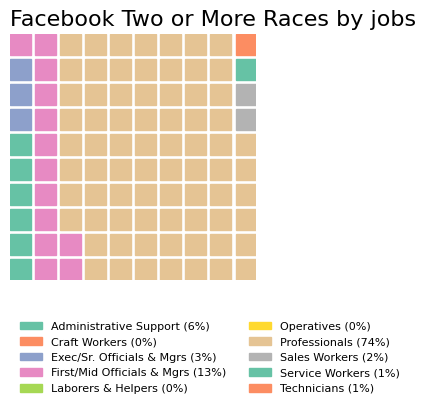

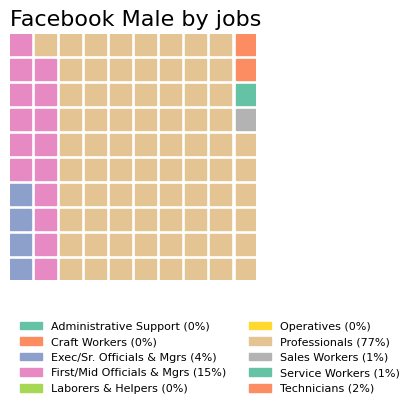

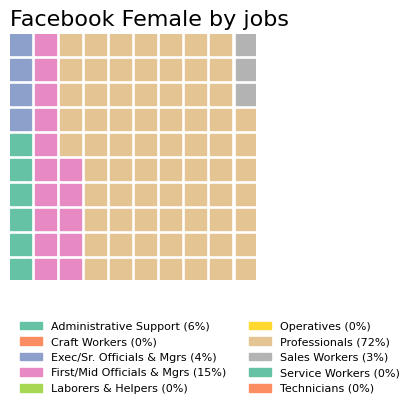

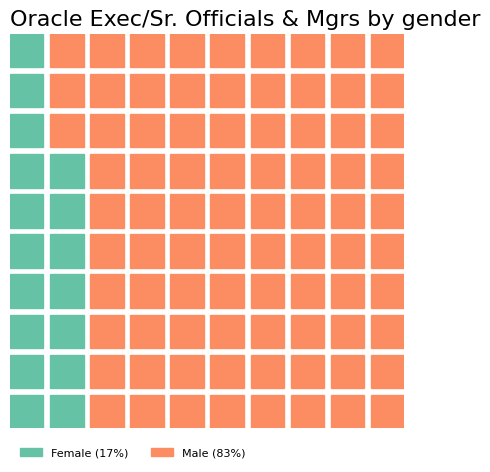

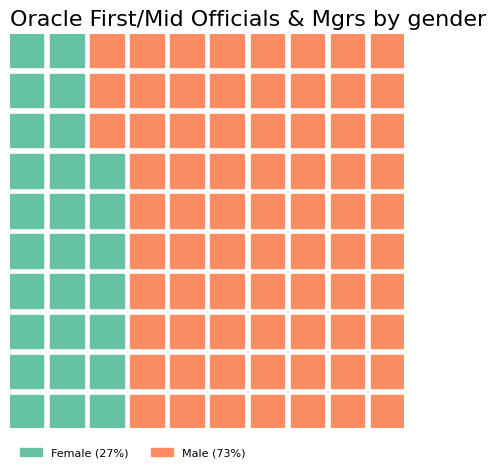

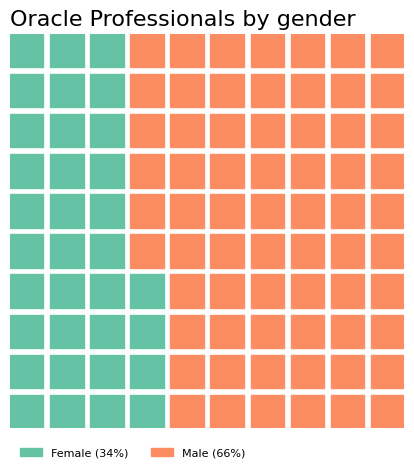

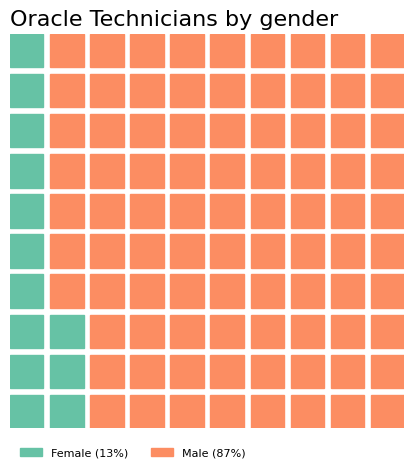

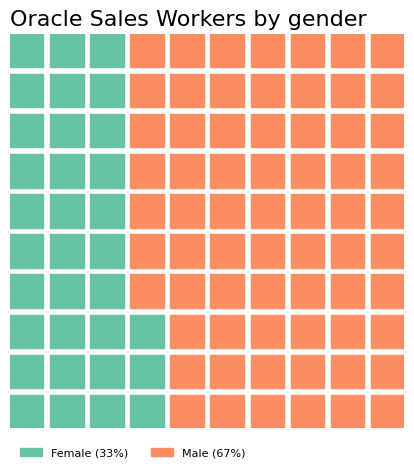

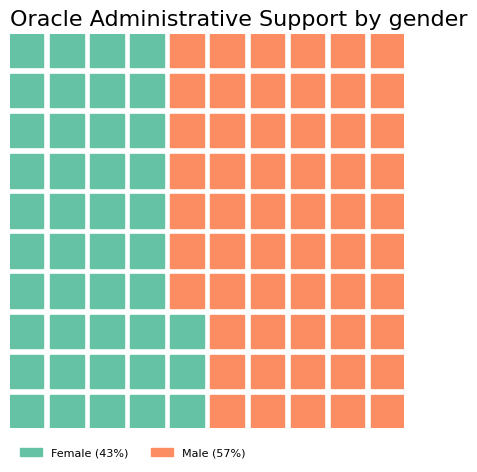

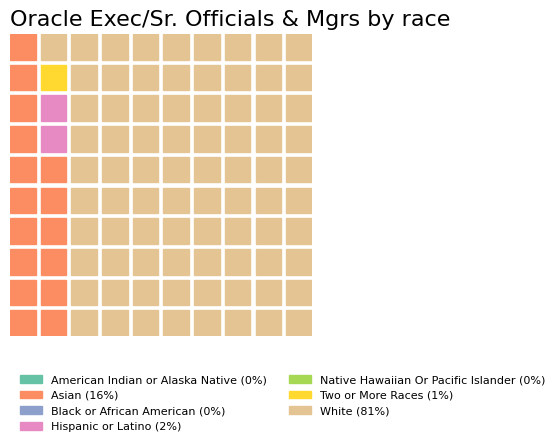

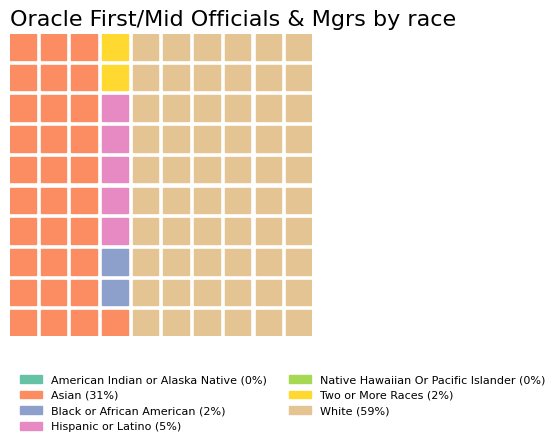

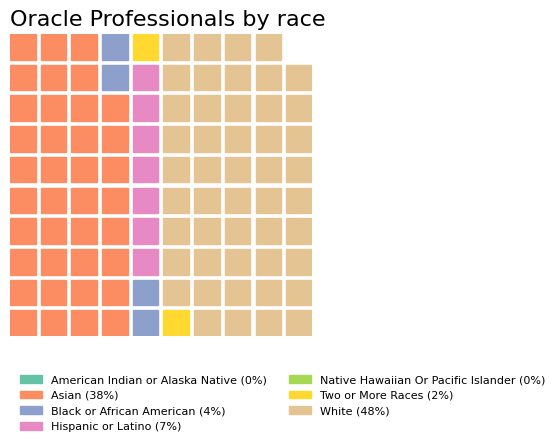

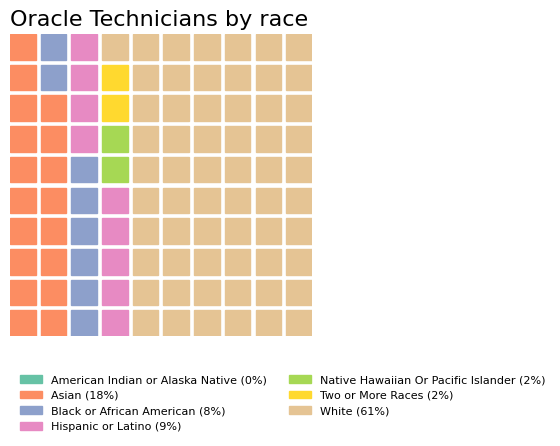

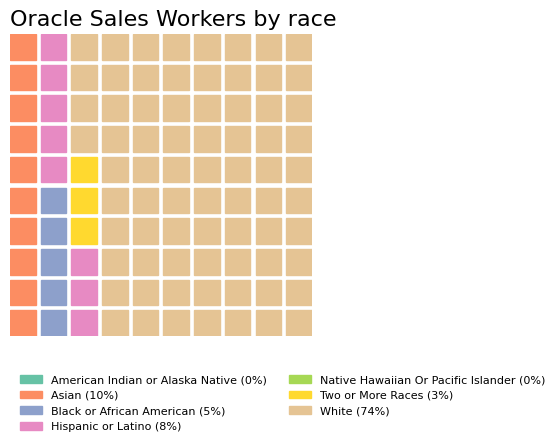

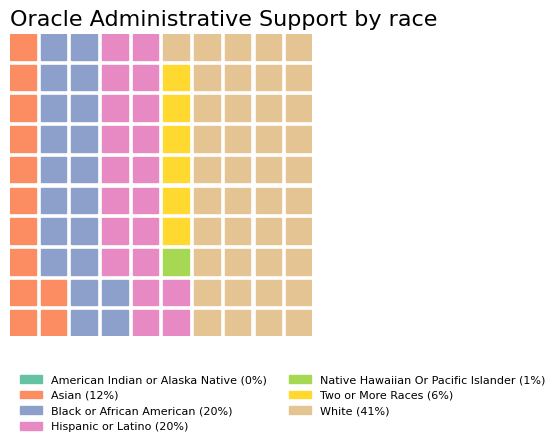

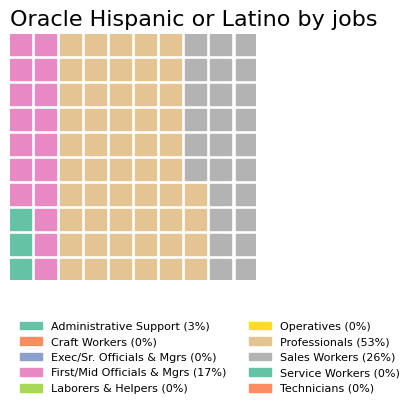

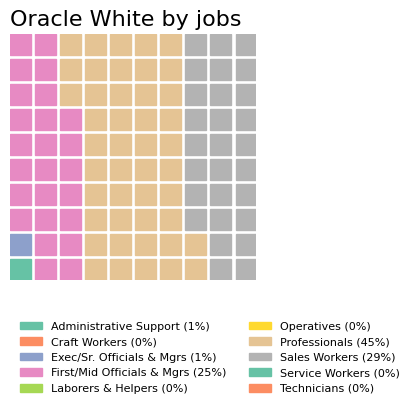

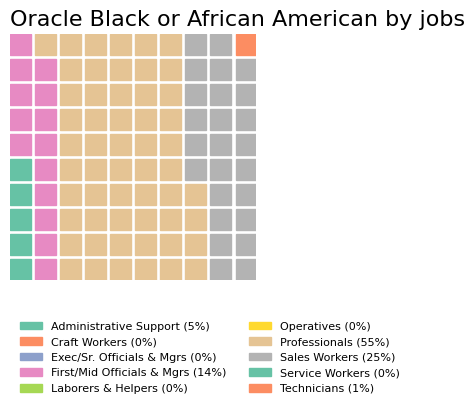

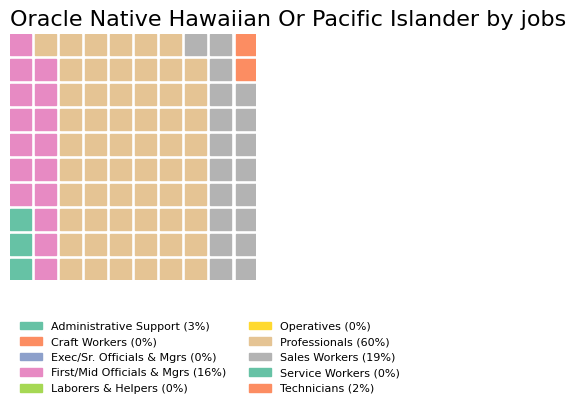

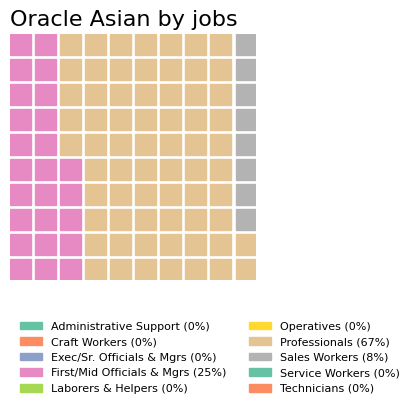

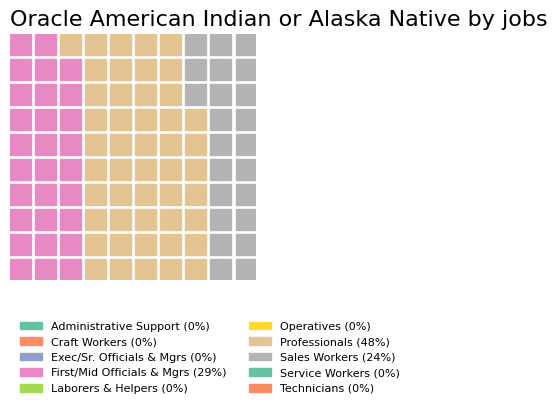

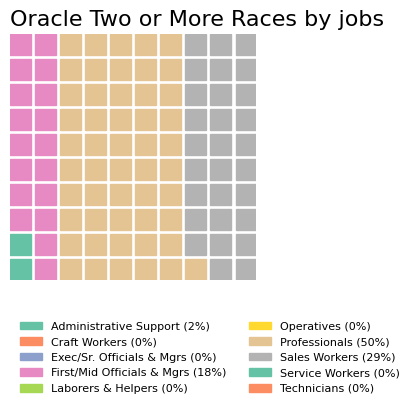

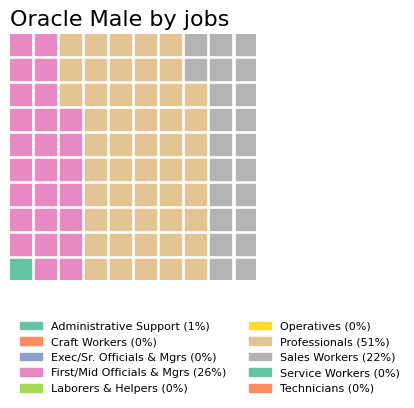

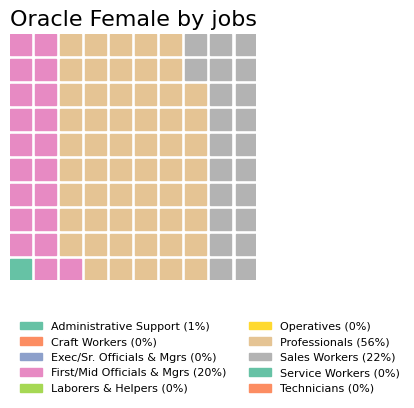

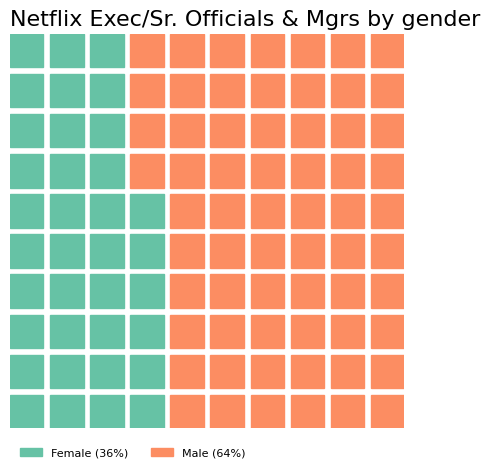

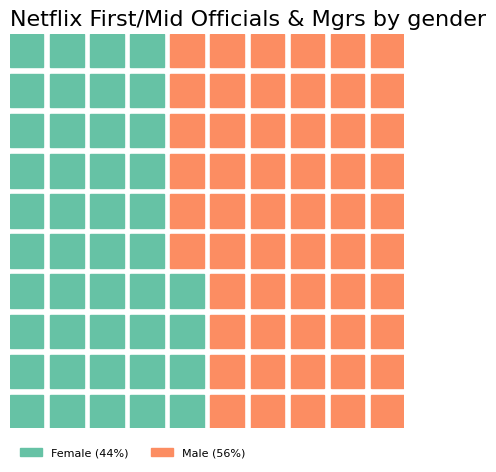

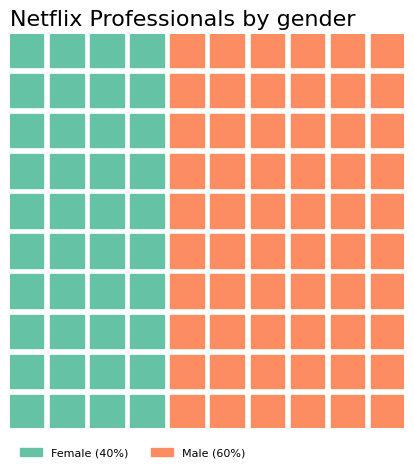

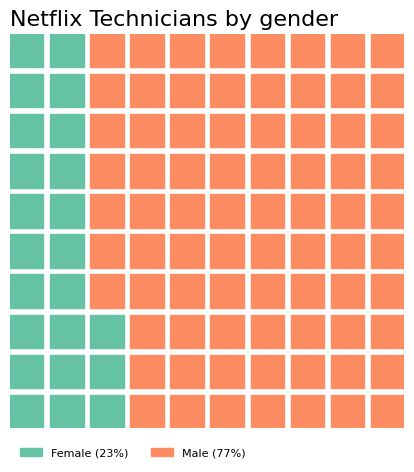

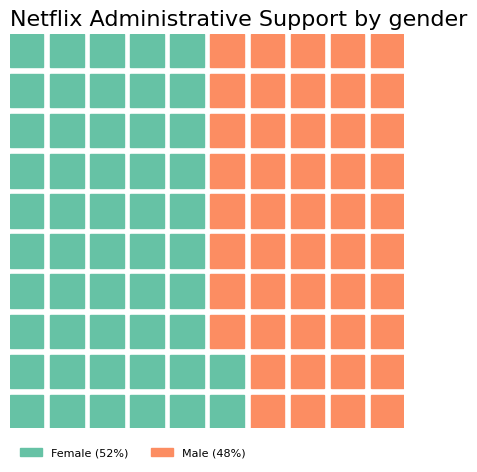

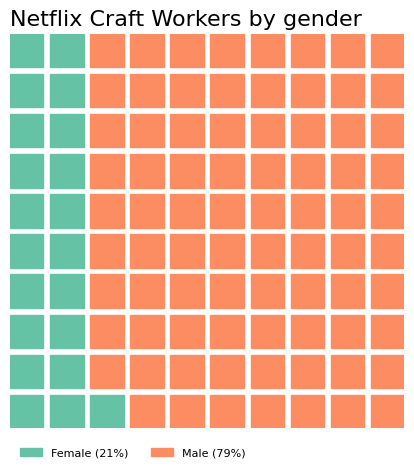

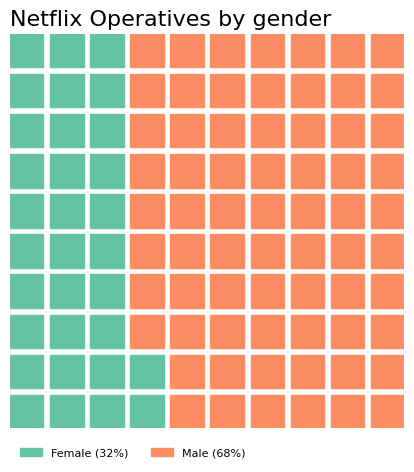

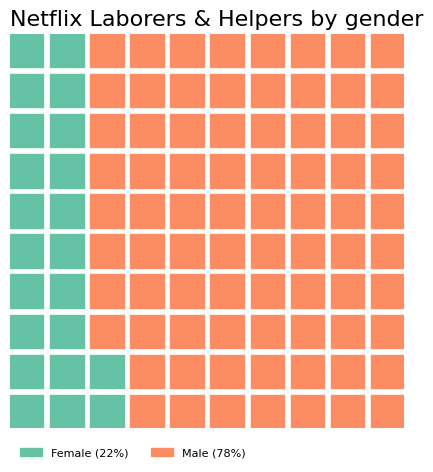

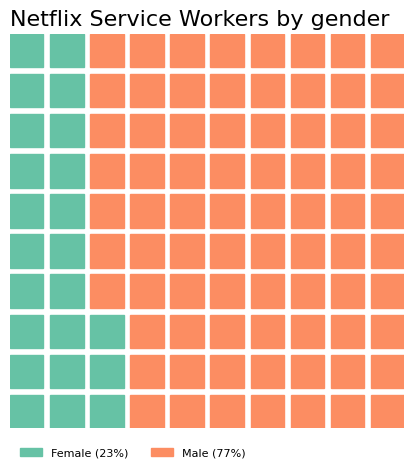

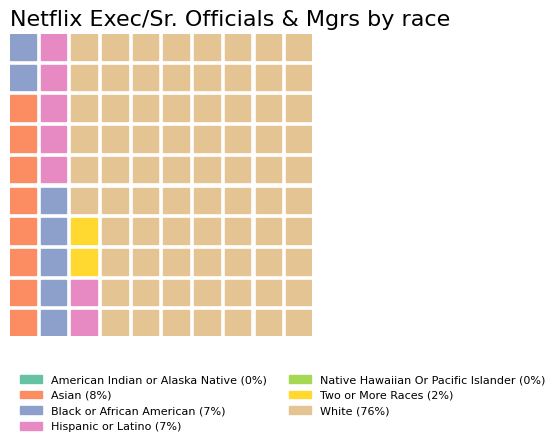

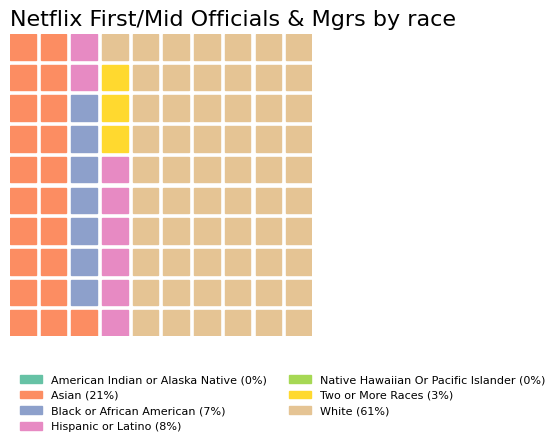

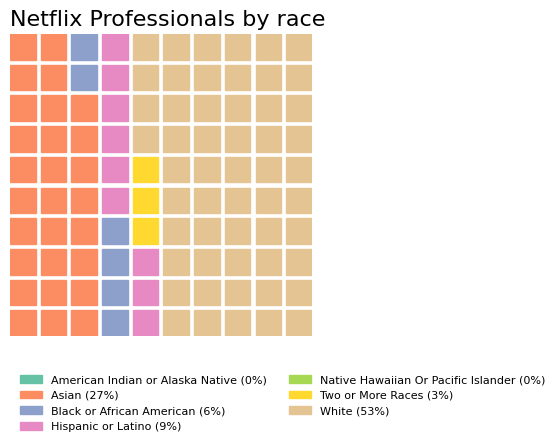

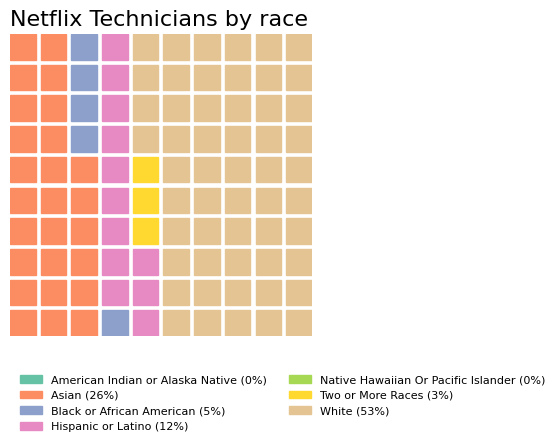

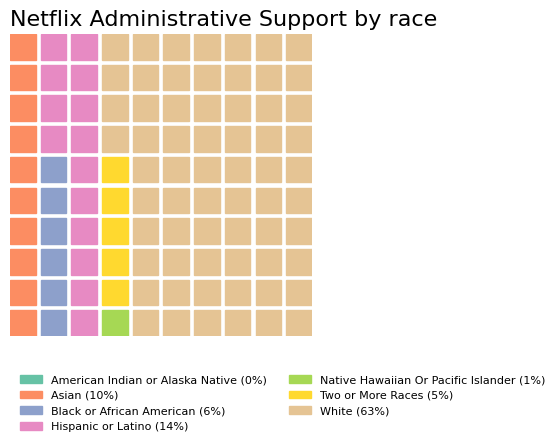

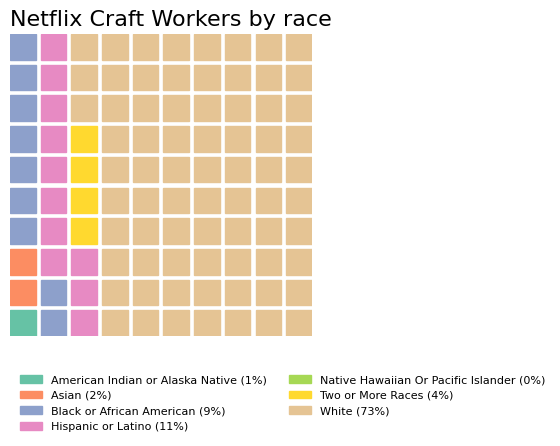

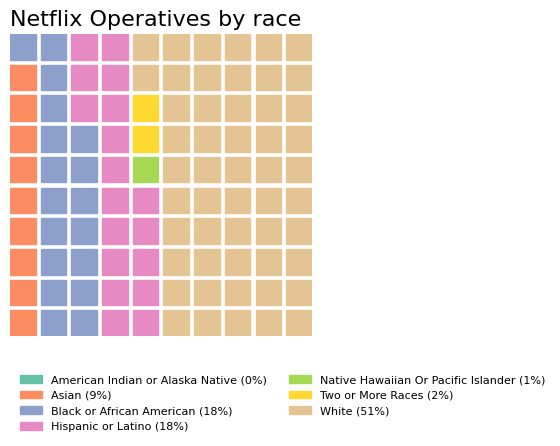

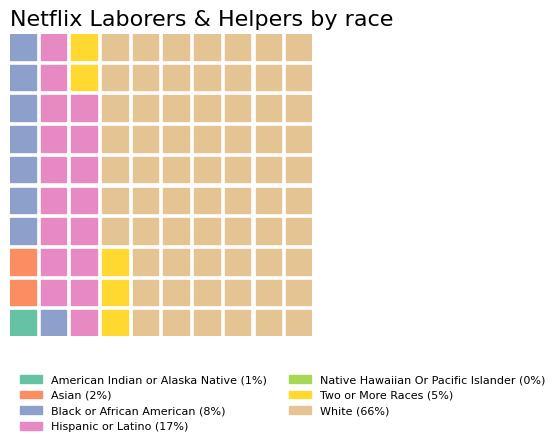

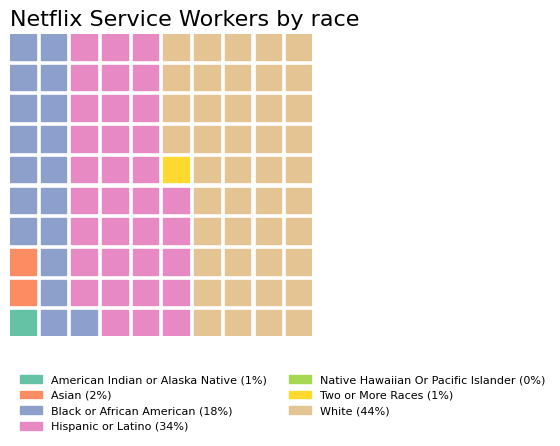

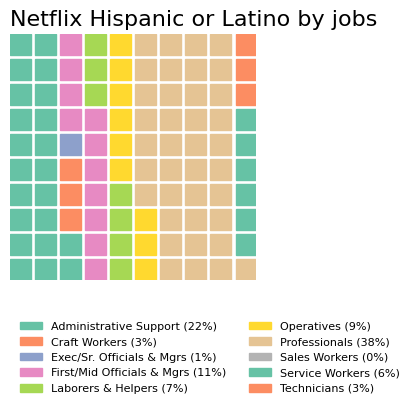

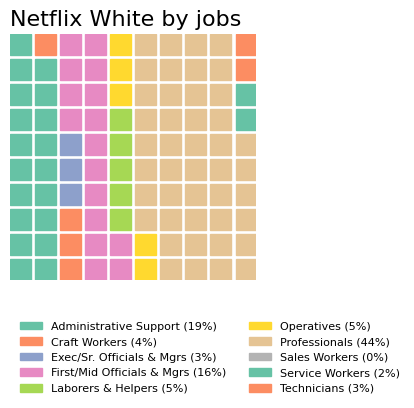

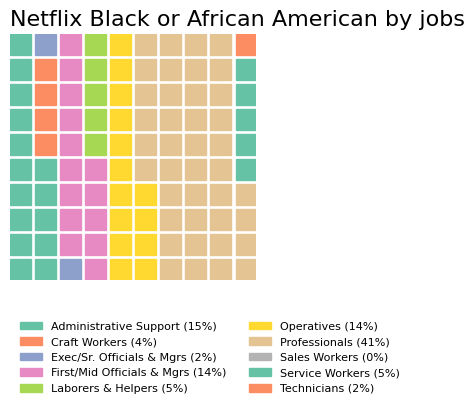

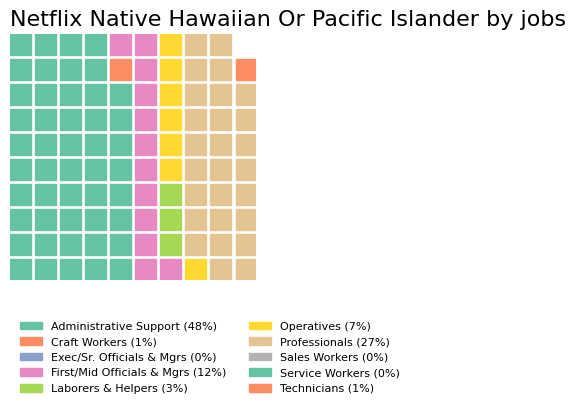

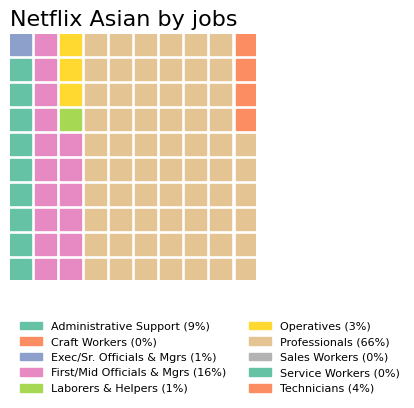

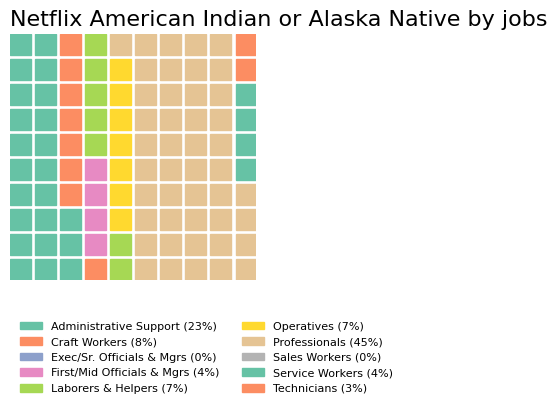

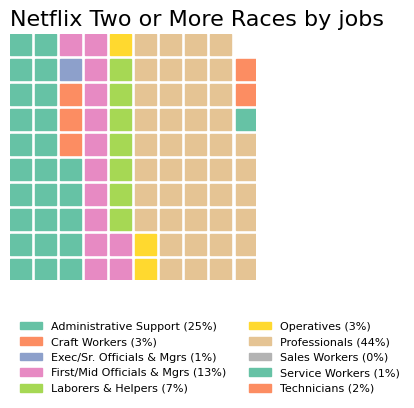

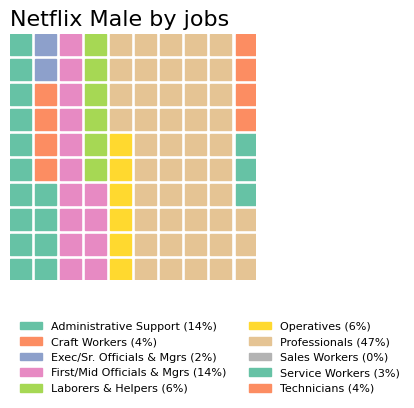

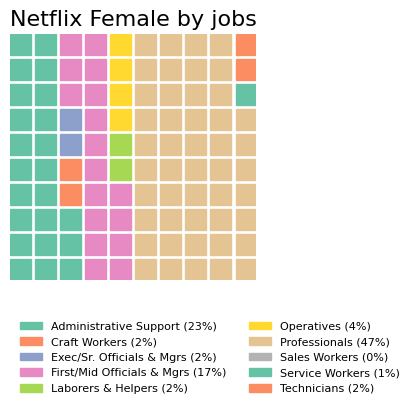

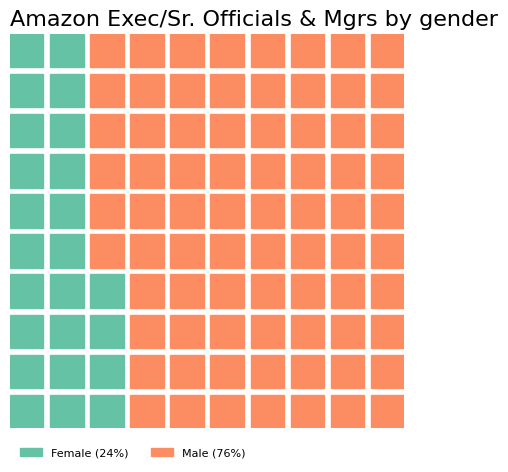

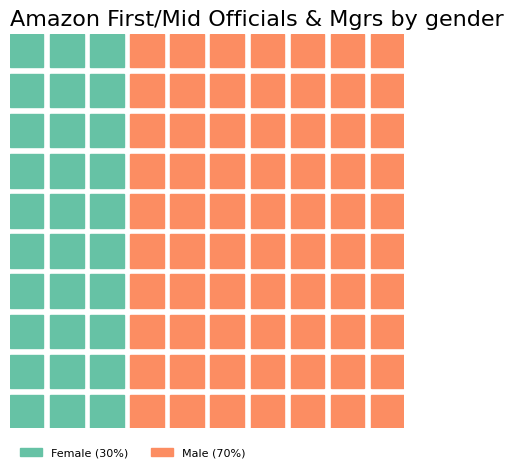

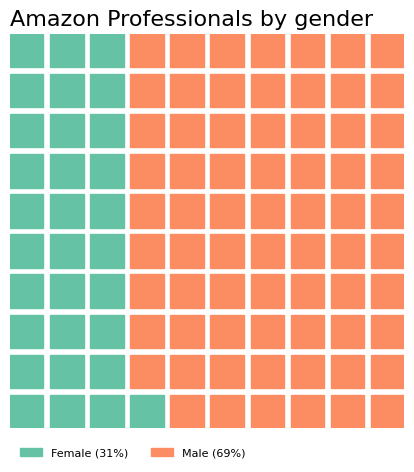

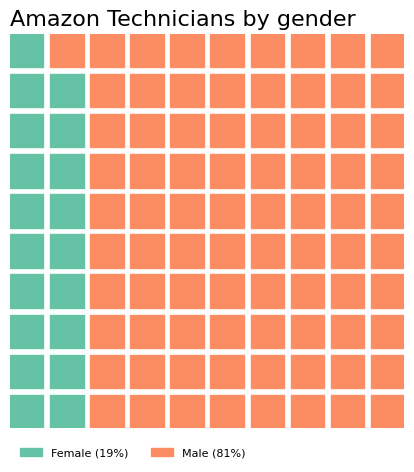

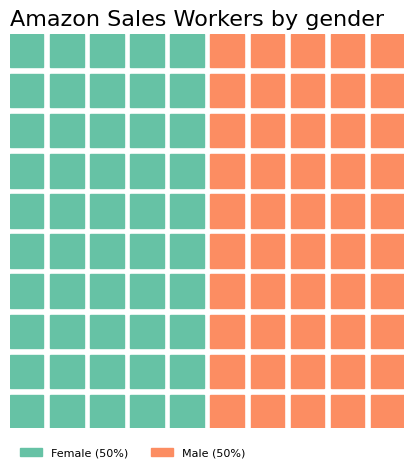

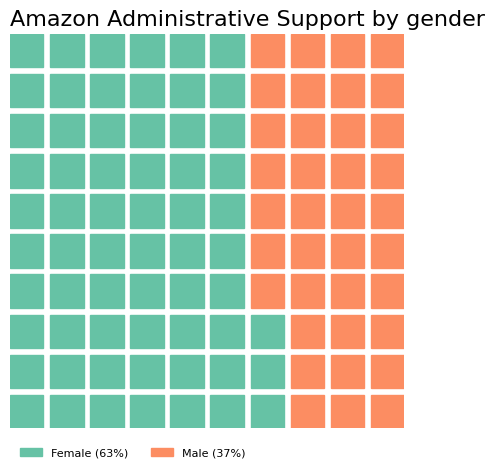

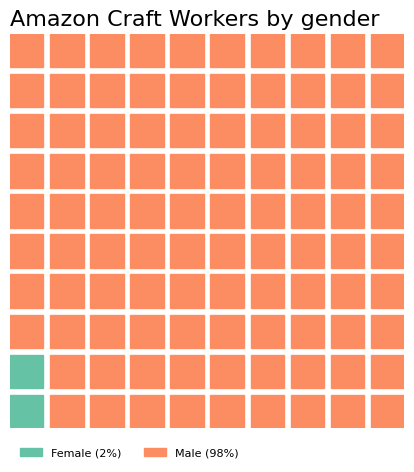

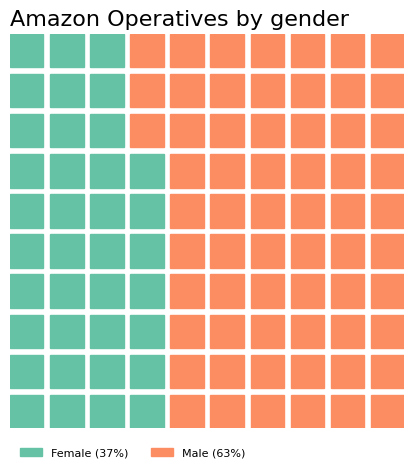

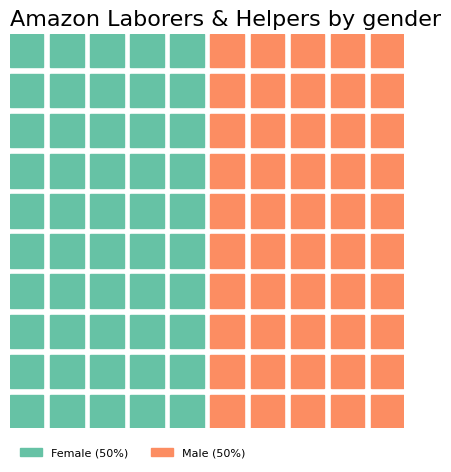

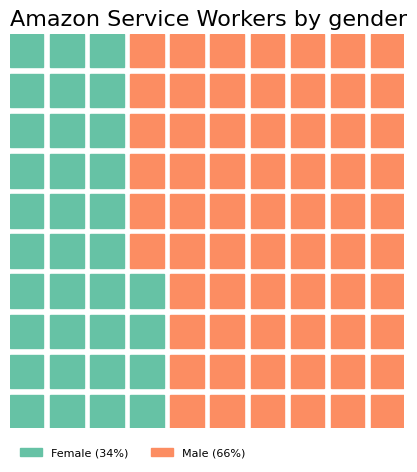

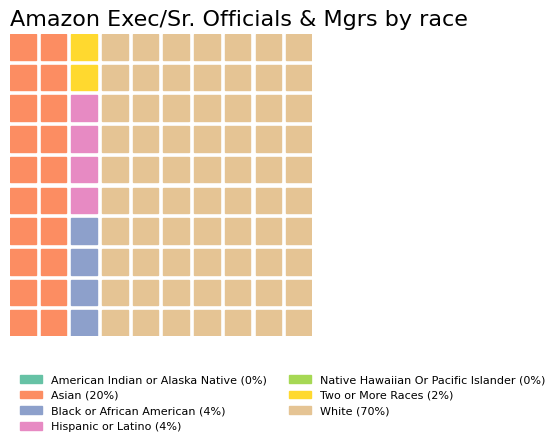

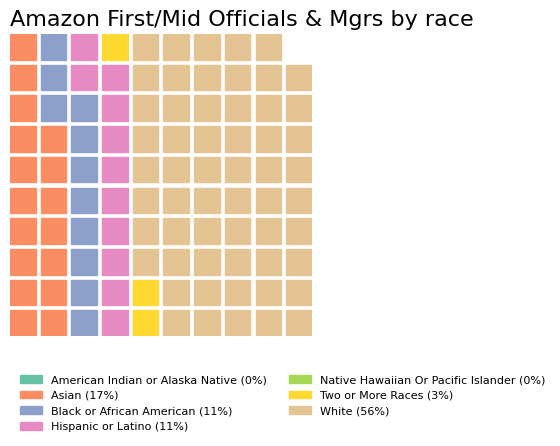

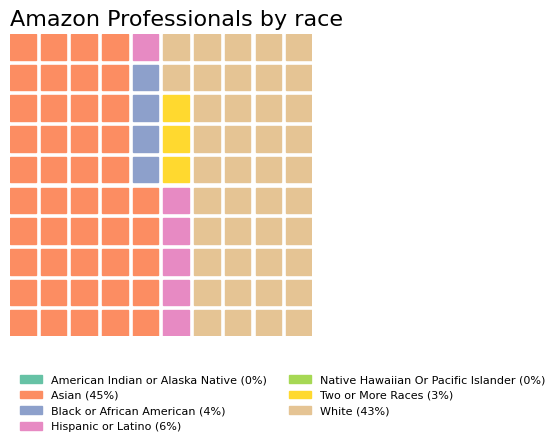

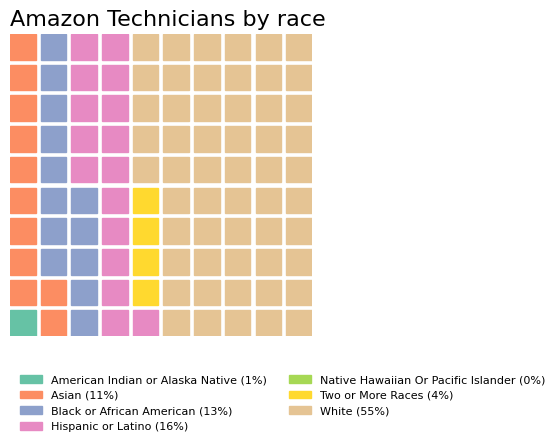

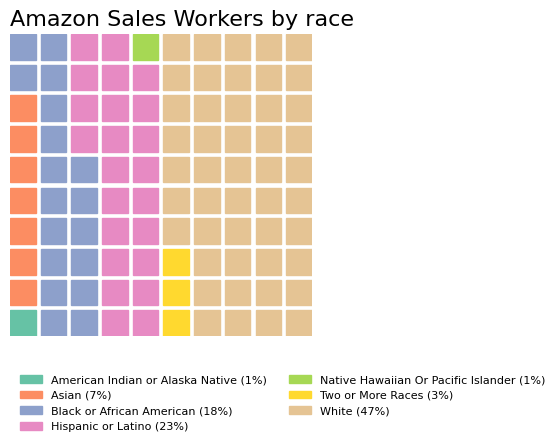

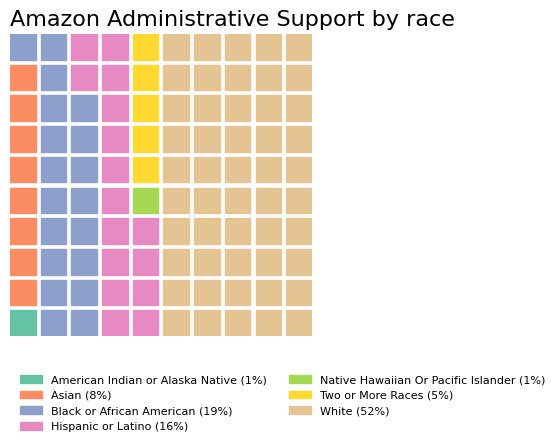

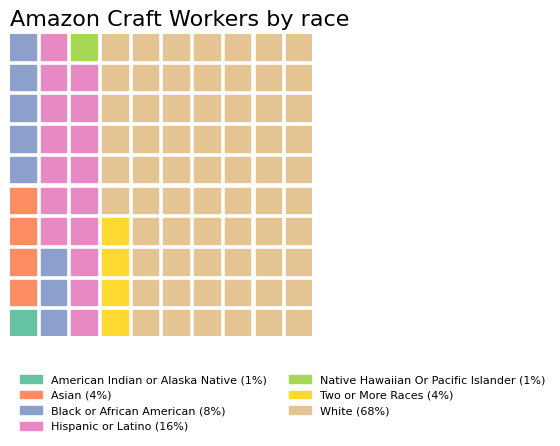

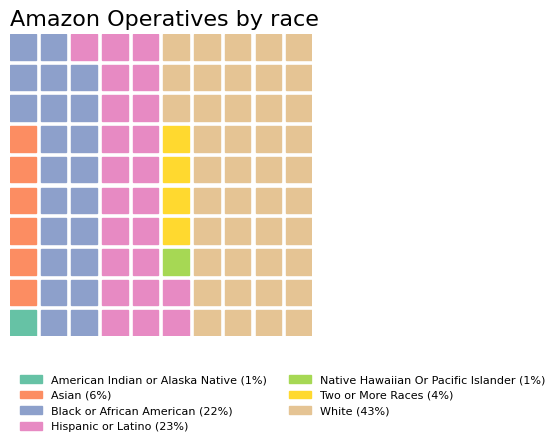

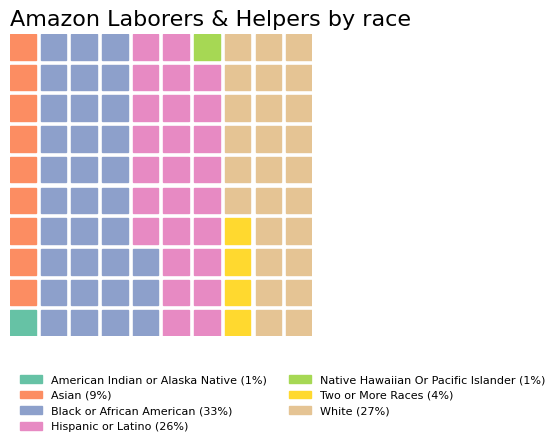

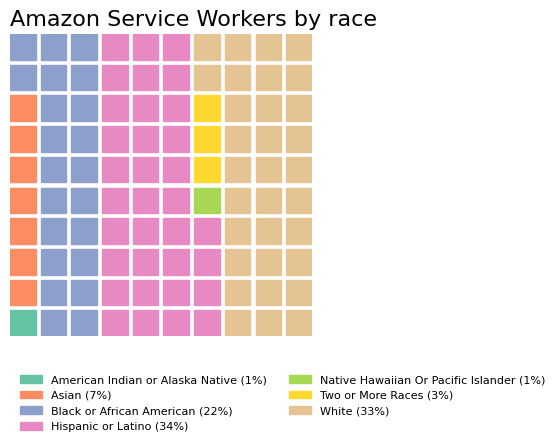

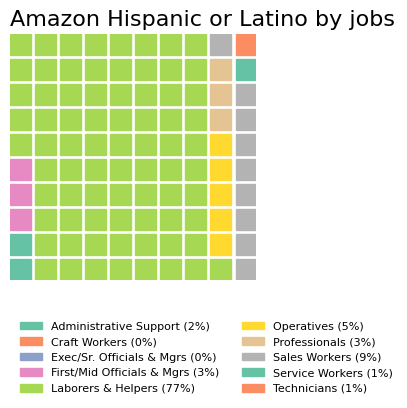

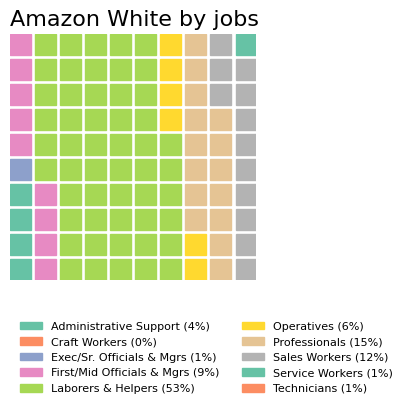

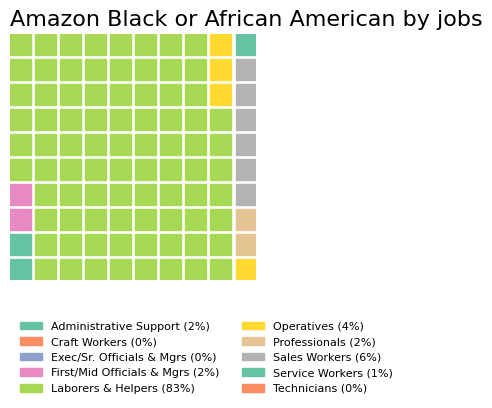

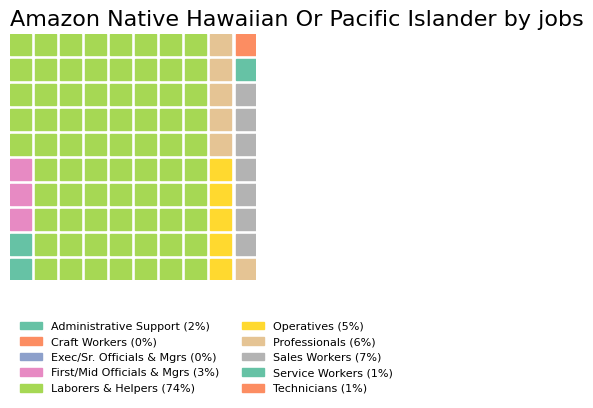

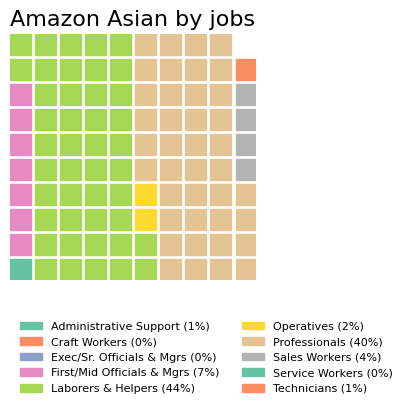

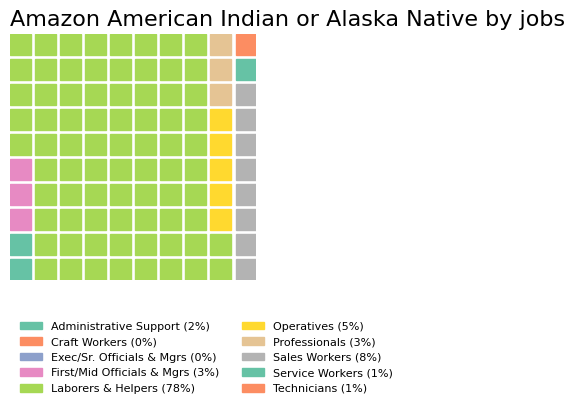

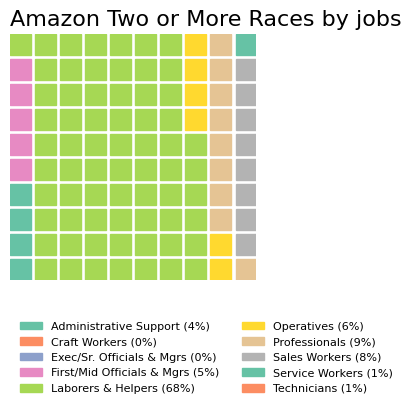

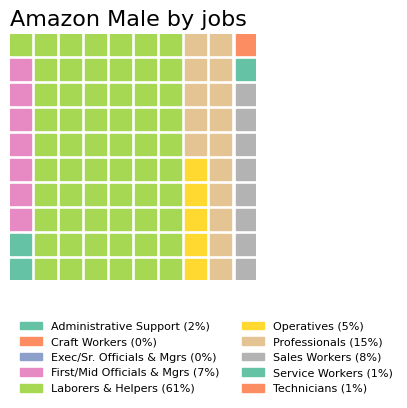

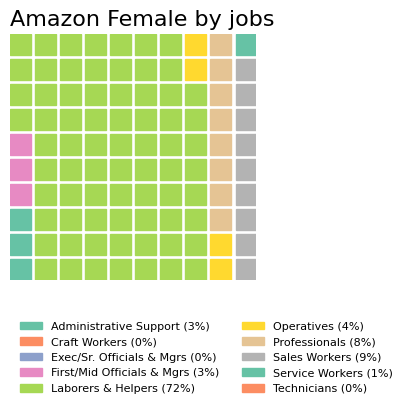

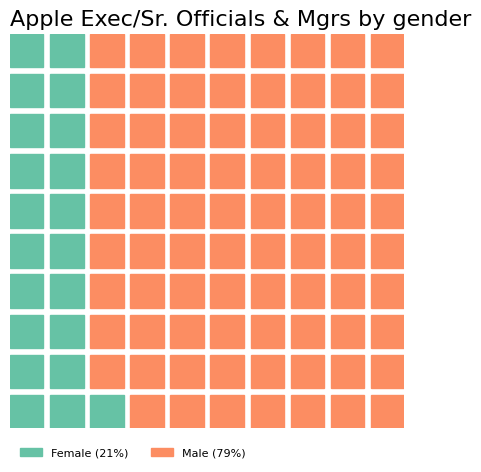

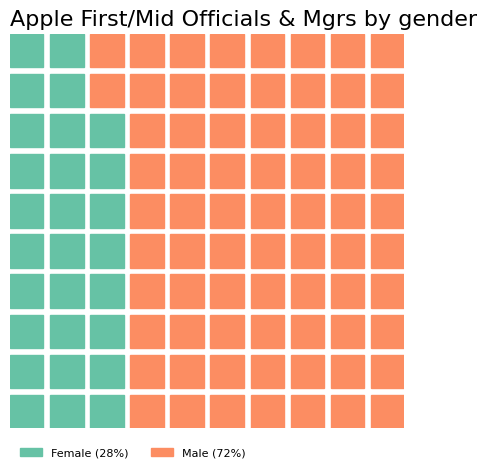

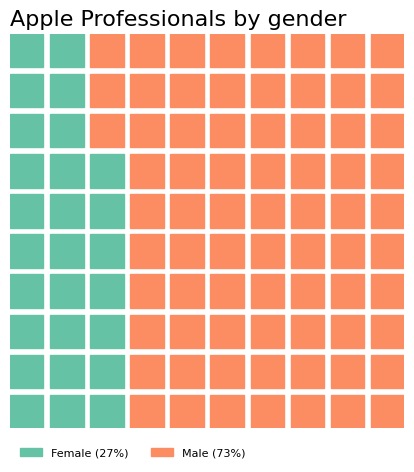

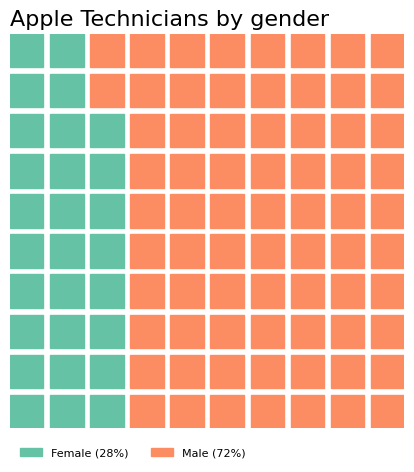

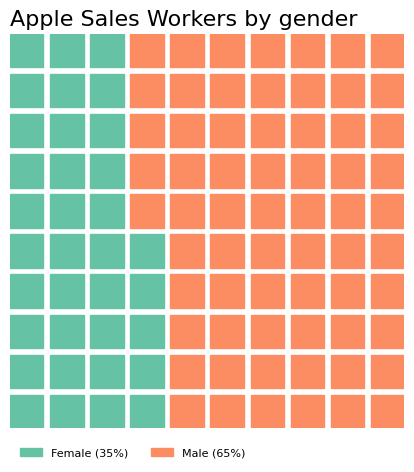

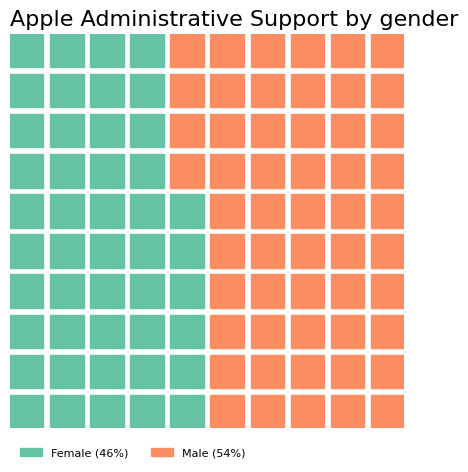

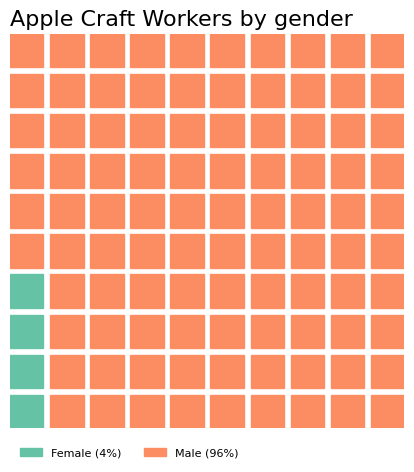

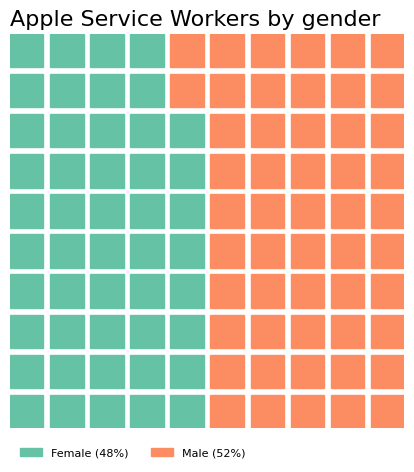

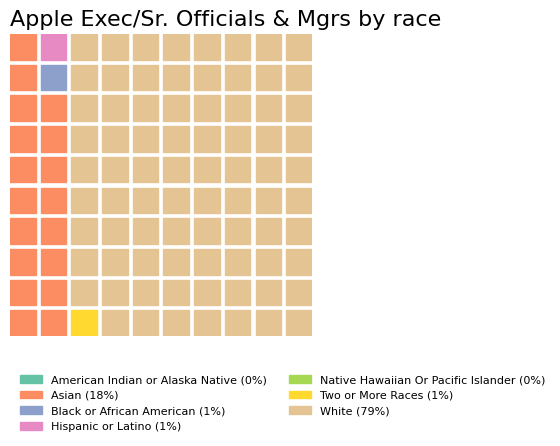

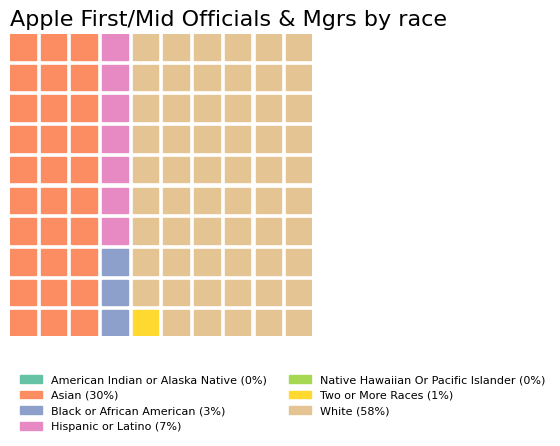

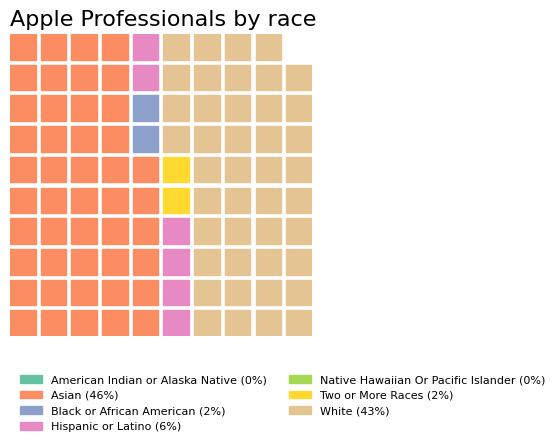

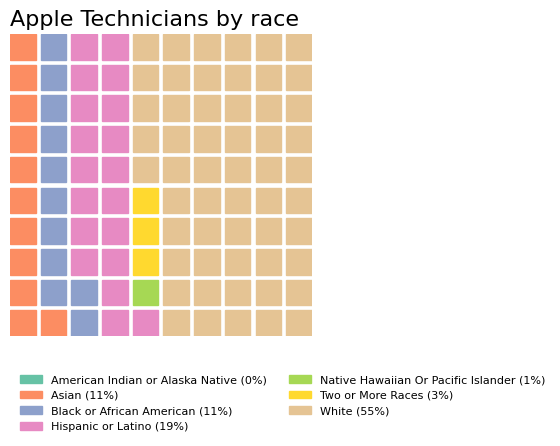

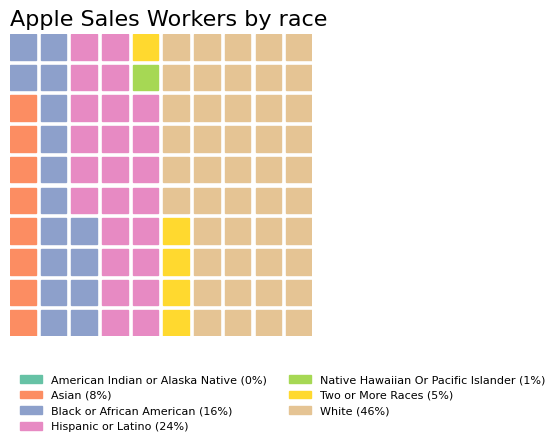

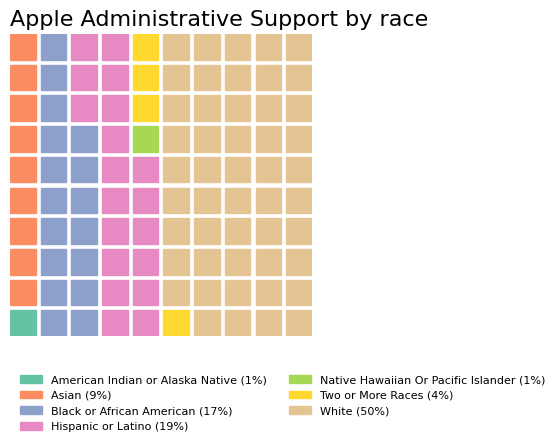

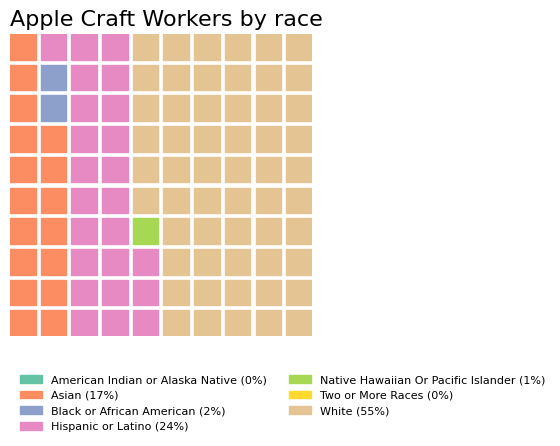

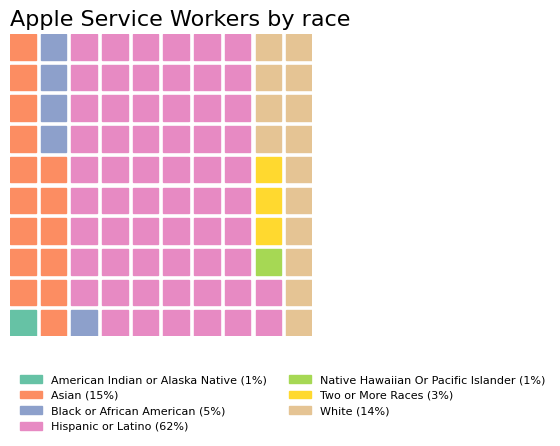

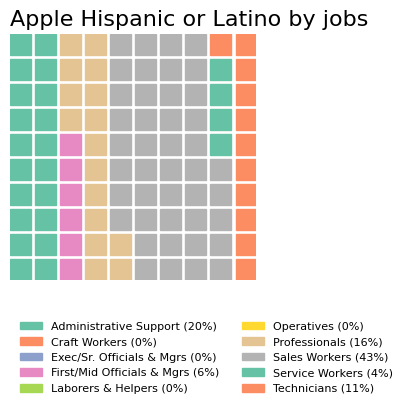

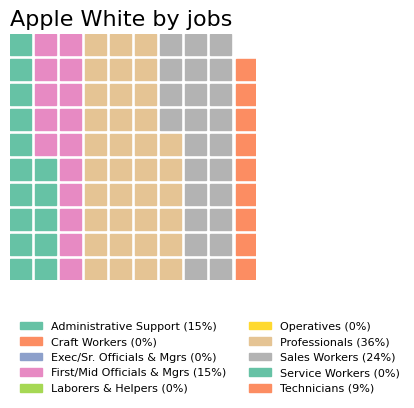

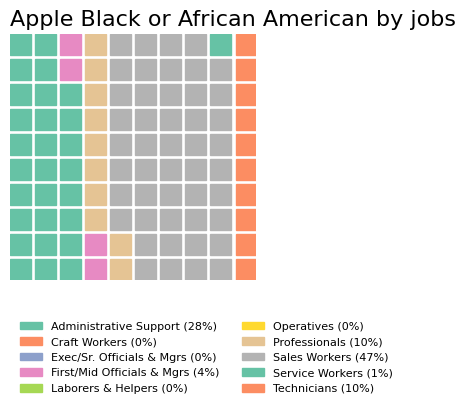

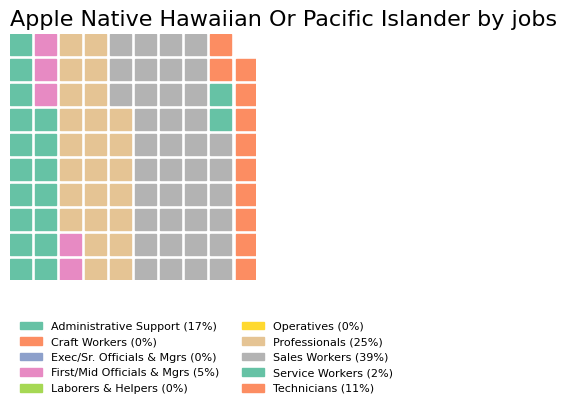

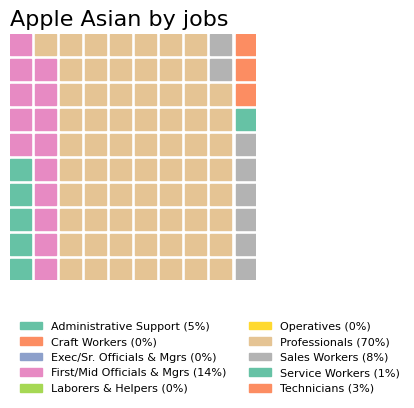

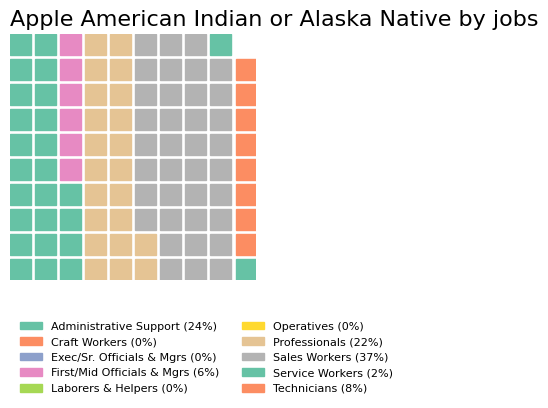

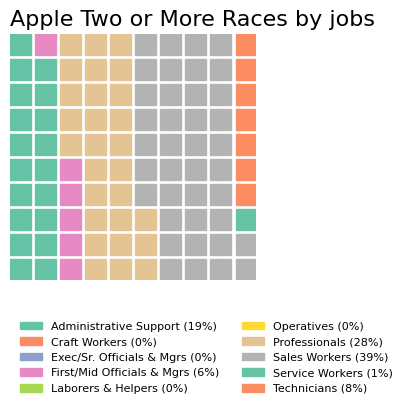

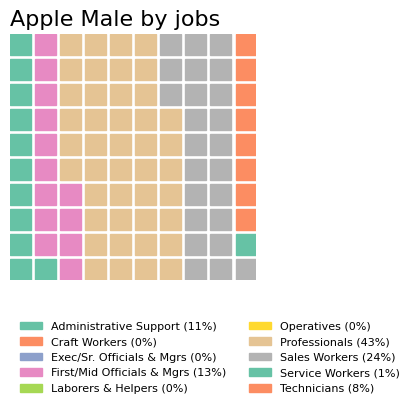

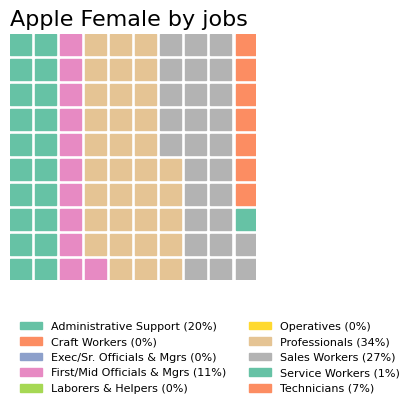

In [24]:
for company, data_dict in company_data.items():
    for key, dict in data_dict.items():
        #get the last part of key after the last '_': this is what we want for the last param of make_waffle_fig
        sortBy2 = key.rpartition('_')[-1]
        for file_name, val_dict in dict.items():
            print(val_dict)
            cat = val_dict['cat']
            data = val_dict['data']['count_employees']
            try: 
                fig = make_waffle_fig(data, cat, file_name, company, sortBy2)
            except ValueError:
                pass
            print(f"made waffle fig")